    PROJECT - Exploratory Data Analysis 
       Dateset: MTA - Turnstile Weekly Dataset
       Data Time Period:  March 2021 - May 2021
       By: Meliz Tyurkileri - melizturkileri@sabanciuniv.edu

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# define a file list used to append weekly datasets
date_list =[220305, 220312, 220319, 220326, 220402, 220409, 220416, 220423, 220430, 220507, 220514, 220521, 220528, 220604]
file_list = [f"http://web.mta.info/developers/data/nyct/turnstile/turnstile_{x}.txt" for x in date_list]
file_list

['http://web.mta.info/developers/data/nyct/turnstile/turnstile_220305.txt',
 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_220312.txt',
 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_220319.txt',
 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_220326.txt',
 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_220402.txt',
 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_220409.txt',
 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_220416.txt',
 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_220423.txt',
 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_220430.txt',
 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_220507.txt',
 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_220514.txt',
 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_220521.txt',
 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_220528.txt',
 'http://web

In [3]:
 # create a for loop to append weekly datasets
main_df = pd.DataFrame(pd.read_csv(file_list[0]))
  
for i in range(1,len(file_list)):
    data = pd.read_csv(file_list[i])
    weekly_df= pd.DataFrame(data)
    main_df = pd.concat([main_df,weekly_df], ignore_index = True)
print(main_df)

           C/A  UNIT       SCP        STATION LINENAME DIVISION        DATE  \
0         A002  R051  02-00-00          59 ST  NQR456W      BMT  02/26/2022   
1         A002  R051  02-00-00          59 ST  NQR456W      BMT  02/26/2022   
2         A002  R051  02-00-00          59 ST  NQR456W      BMT  02/26/2022   
3         A002  R051  02-00-00          59 ST  NQR456W      BMT  02/26/2022   
4         A002  R051  02-00-00          59 ST  NQR456W      BMT  02/26/2022   
...        ...   ...       ...            ...      ...      ...         ...   
2951391  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  06/03/2022   
2951392  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  06/03/2022   
2951393  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  06/03/2022   
2951394  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  06/03/2022   
2951395  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  06/03/2022   

             TIME     DESC  ENTRIES  \
0        03:

In [4]:
# check for indexes
main_df.tail(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
2951391,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,05:00:00,REGULAR,0,433
2951392,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,09:00:00,REGULAR,0,433
2951393,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,13:00:00,REGULAR,0,433
2951394,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,17:00:00,REGULAR,0,435
2951395,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,21:00:00,REGULAR,0,435


In [5]:
main_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,03:00:00,REGULAR,7689737,2671257
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,11:00:00,REGULAR,7689758,2671380
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,15:00:00,REGULAR,7689791,2671465
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,19:00:00,REGULAR,7689858,2671530


In [6]:
# check variable types and null values
main_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2951396 entries, 0 to 2951395
Data columns (total 11 columns):
 #   Column                                                                Non-Null Count    Dtype 
---  ------                                                                --------------    ----- 
 0   C/A                                                                   2951396 non-null  object
 1   UNIT                                                                  2951396 non-null  object
 2   SCP                                                                   2951396 non-null  object
 3   STATION                                                               2951396 non-null  object
 4   LINENAME                                                              2951396 non-null  object
 5   DIVISION                                                              2951396 non-null  object
 6   DATE                                                                  2951396 non-

In [7]:
# check for column names
main_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [8]:
# rename columns and keep the changes
main_df.rename(columns={'C/A': 'control_area','UNIT':'station_id','SCP':'device_position', 'STATION': 'station', 'LINENAME':'line','DIVISION':'division','DATE':'date','TIME':'time','DESC':'interval','ENTRIES':'entry','EXITS                                                               ':'exit'},inplace=True)

In [9]:
main_df.columns

Index(['control_area', 'station_id', 'device_position', 'station', 'line',
       'division', 'date', 'time', 'interval', 'entry', 'exit'],
      dtype='object')

In [10]:
# format numeric entries
pd.options.display.float_format = '{:,.1f}'.format

In [11]:
# check summary statistics for entry and exit levels
main_df.describe()

,entry,exit
count,"2,951,396.0","2,951,396.0"
mean,"42,937,462.0","34,554,979.9"
std,"223,558,595.2","197,082,673.0"
min,0.0,0.0
25%,"249,067.0","132,792.8"
50%,"1,354,766.0","886,175.5"
75%,"5,965,626.8","3,975,187.0"
max,"2,147,319,334.0","2,122,443,345.0"


In [12]:
# check the data type of date
main_df.date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2951396 entries, 0 to 2951395
Series name: date
Non-Null Count    Dtype 
--------------    ----- 
2951396 non-null  object
dtypes: object(1)
memory usage: 22.5+ MB


In [13]:
# check the date
main_df.date.head(20)

0     02/26/2022
1     02/26/2022
2     02/26/2022
3     02/26/2022
4     02/26/2022
5     02/26/2022
6     02/27/2022
7     02/27/2022
8     02/27/2022
9     02/27/2022
10    02/27/2022
11    02/27/2022
12    02/28/2022
13    02/28/2022
14    02/28/2022
15    02/28/2022
16    02/28/2022
17    02/28/2022
18    03/01/2022
19    03/01/2022
Name: date, dtype: object

In [14]:
# concate date and time and create a timestamp 
main_df['timestamp']=pd.to_datetime(main_df['date'] + ' ' + main_df['time'])

# check data type of timestamp
main_df.timestamp.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2951396 entries, 0 to 2951395
Series name: timestamp
Non-Null Count    Dtype         
--------------    -----         
2951396 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 22.5 MB


In [15]:
main_df.head(5)

,control_area,station_id,device_position,station,line,division,date,time,interval,entry,exit,timestamp
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,03:00:00,REGULAR,7689737,2671257,2022-02-26 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278,2022-02-26 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,11:00:00,REGULAR,7689758,2671380,2022-02-26 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,15:00:00,REGULAR,7689791,2671465,2022-02-26 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,19:00:00,REGULAR,7689858,2671530,2022-02-26 19:00:00


In [16]:
# create unique turnstile id and observation id 
   # we will use observation id to see whether there is any dublicate
main_df["turnstile_id"] = main_df['station_id'] +"-"+ main_df["control_area"] +"-"+ main_df["device_position"]
main_df["observation_id"] = main_df['turnstile_id'] +"-"+ main_df['timestamp'].astype(str)
main_df.head(5)

,control_area,station_id,device_position,station,line,division,date,time,interval,entry,exit,timestamp,turnstile_id,observation_id
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,03:00:00,REGULAR,7689737,2671257,2022-02-26 03:00:00,R051-A002-02-00-00,R051-A002-02-00-00-2022-02-26 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278,2022-02-26 07:00:00,R051-A002-02-00-00,R051-A002-02-00-00-2022-02-26 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,11:00:00,REGULAR,7689758,2671380,2022-02-26 11:00:00,R051-A002-02-00-00,R051-A002-02-00-00-2022-02-26 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,15:00:00,REGULAR,7689791,2671465,2022-02-26 15:00:00,R051-A002-02-00-00,R051-A002-02-00-00-2022-02-26 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,19:00:00,REGULAR,7689858,2671530,2022-02-26 19:00:00,R051-A002-02-00-00,R051-A002-02-00-00-2022-02-26 19:00:00


In [17]:
# check number of dublicated observations
main_df.duplicated(keep="last").value_counts()

False    2951396
dtype: int64

In [18]:
# drop dublicated observations
main_df.drop_duplicates(keep="first", inplace=True)


In [19]:
# additional: extract hour from the timestamp
main_df['hour'] = main_df.timestamp.dt.hour
main_df.head(5)

,control_area,station_id,device_position,station,line,division,date,time,interval,entry,exit,timestamp,turnstile_id,observation_id,hour
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,03:00:00,REGULAR,7689737,2671257,2022-02-26 03:00:00,R051-A002-02-00-00,R051-A002-02-00-00-2022-02-26 03:00:00,3
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278,2022-02-26 07:00:00,R051-A002-02-00-00,R051-A002-02-00-00-2022-02-26 07:00:00,7
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,11:00:00,REGULAR,7689758,2671380,2022-02-26 11:00:00,R051-A002-02-00-00,R051-A002-02-00-00-2022-02-26 11:00:00,11
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,15:00:00,REGULAR,7689791,2671465,2022-02-26 15:00:00,R051-A002-02-00-00,R051-A002-02-00-00-2022-02-26 15:00:00,15
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,19:00:00,REGULAR,7689858,2671530,2022-02-26 19:00:00,R051-A002-02-00-00,R051-A002-02-00-00-2022-02-26 19:00:00,19


In [20]:
# additional: flag the day of week "Monday"-"Sunday" etc.
main_df["weekdays"] = main_df.timestamp.dt.day_name()

In [21]:
main_df.head()

,control_area,station_id,device_position,station,line,division,date,time,interval,entry,exit,timestamp,turnstile_id,observation_id,hour,weekdays
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,03:00:00,REGULAR,7689737,2671257,2022-02-26 03:00:00,R051-A002-02-00-00,R051-A002-02-00-00-2022-02-26 03:00:00,3,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278,2022-02-26 07:00:00,R051-A002-02-00-00,R051-A002-02-00-00-2022-02-26 07:00:00,7,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,11:00:00,REGULAR,7689758,2671380,2022-02-26 11:00:00,R051-A002-02-00-00,R051-A002-02-00-00-2022-02-26 11:00:00,11,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,15:00:00,REGULAR,7689791,2671465,2022-02-26 15:00:00,R051-A002-02-00-00,R051-A002-02-00-00-2022-02-26 15:00:00,15,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,19:00:00,REGULAR,7689858,2671530,2022-02-26 19:00:00,R051-A002-02-00-00,R051-A002-02-00-00-2022-02-26 19:00:00,19,Saturday


In [22]:
# additional: extract week of year from the timestamp
main_df["week"] = main_df["timestamp"].dt.isocalendar().week

In [23]:
# additional: extract day from the timestamp
main_df["day"] = main_df["timestamp"].dt.day

In [24]:
# additional: extract month from the timestamp
main_df["month"] = main_df["timestamp"].dt.month

In [25]:
main_df.head()

,control_area,station_id,device_position,station,line,division,date,time,interval,entry,exit,timestamp,turnstile_id,observation_id,hour,weekdays,week,day,month
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,03:00:00,REGULAR,7689737,2671257,2022-02-26 03:00:00,R051-A002-02-00-00,R051-A002-02-00-00-2022-02-26 03:00:00,3,Saturday,8,26,2
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278,2022-02-26 07:00:00,R051-A002-02-00-00,R051-A002-02-00-00-2022-02-26 07:00:00,7,Saturday,8,26,2
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,11:00:00,REGULAR,7689758,2671380,2022-02-26 11:00:00,R051-A002-02-00-00,R051-A002-02-00-00-2022-02-26 11:00:00,11,Saturday,8,26,2
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,15:00:00,REGULAR,7689791,2671465,2022-02-26 15:00:00,R051-A002-02-00-00,R051-A002-02-00-00-2022-02-26 15:00:00,15,Saturday,8,26,2
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,19:00:00,REGULAR,7689858,2671530,2022-02-26 19:00:00,R051-A002-02-00-00,R051-A002-02-00-00-2022-02-26 19:00:00,19,Saturday,8,26,2


In [26]:
# check for unique values to see whether there is any discrepancy in the dataset
main_df.month.unique() 

array([2, 3, 4, 5, 6])

In [27]:
# check for unique values to see whether there is any discrepancy in the dataset
main_df.week.unique() 

<IntegerArray>
[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
Length: 15, dtype: UInt32

In [28]:
# check for unique values to see whether there is any discrepancy in the dataset
main_df.day.unique() 

array([26, 27, 28,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
       15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 29, 30, 31])

In [29]:
# check for unique values to see whether there is any discrepancy in the dataset
main_df.weekdays.unique() 

array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

In [30]:
# check for unique values to see whether there is any discrepancy in the dataset
main_df.hour.unique() 

array([ 3,  7, 11, 15, 19, 23,  1,  5,  9, 12, 13, 17, 21,  8,  0,  4, 16,
       20,  2,  6, 10, 14, 18, 22])

In [31]:
# recognized that most of the observations come from "0-4-8-12-16-20 and "1-5-9-13-17-21" time circles.
main_df.hour.value_counts()

8     256575
12    255324
16    255044
20    254899
4     254811
0     254270
5     167241
9     166829
21    166658
13    166555
17    166351
1     164441
7      51882
15     50810
11     50739
23     50668
19     50589
3      50192
6      20032
22     19912
14     19706
10     19500
18     19485
2      18883
Name: hour, dtype: int64

In [32]:
main_df.interval.unique() 

array(['REGULAR', 'RECOVR AUD'], dtype=object)

In [33]:
# flag the observations that belong to weekends 
main_df['weekend'] = (main_df.weekdays == "Saturday") |  (main_df.weekdays == "Sunday")
main_df.head()

,control_area,station_id,device_position,station,line,division,date,time,interval,entry,exit,timestamp,turnstile_id,observation_id,hour,weekdays,week,day,month,weekend
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,03:00:00,REGULAR,7689737,2671257,2022-02-26 03:00:00,R051-A002-02-00-00,R051-A002-02-00-00-2022-02-26 03:00:00,3,Saturday,8,26,2,True
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278,2022-02-26 07:00:00,R051-A002-02-00-00,R051-A002-02-00-00-2022-02-26 07:00:00,7,Saturday,8,26,2,True
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,11:00:00,REGULAR,7689758,2671380,2022-02-26 11:00:00,R051-A002-02-00-00,R051-A002-02-00-00-2022-02-26 11:00:00,11,Saturday,8,26,2,True
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,15:00:00,REGULAR,7689791,2671465,2022-02-26 15:00:00,R051-A002-02-00-00,R051-A002-02-00-00-2022-02-26 15:00:00,15,Saturday,8,26,2,True
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,19:00:00,REGULAR,7689858,2671530,2022-02-26 19:00:00,R051-A002-02-00-00,R051-A002-02-00-00-2022-02-26 19:00:00,19,Saturday,8,26,2,True


In [34]:
# reorder column names
main_df= main_df[['turnstile_id','observation_id','station_id', 'station', 'line', 'division', 'control_area', 'device_position', 'timestamp','interval','date','time','entry','exit','hour','weekdays','week', 'day','month','weekend']]
main_df.head()


,turnstile_id,observation_id,station_id,station,line,division,control_area,device_position,timestamp,interval,date,time,entry,exit,hour,weekdays,week,day,month,weekend
0,R051-A002-02-00-00,R051-A002-02-00-00-2022-02-26 03:00:00,R051,59 ST,NQR456W,BMT,A002,02-00-00,2022-02-26 03:00:00,REGULAR,02/26/2022,03:00:00,7689737,2671257,3,Saturday,8,26,2,True
1,R051-A002-02-00-00,R051-A002-02-00-00-2022-02-26 07:00:00,R051,59 ST,NQR456W,BMT,A002,02-00-00,2022-02-26 07:00:00,REGULAR,02/26/2022,07:00:00,7689741,2671278,7,Saturday,8,26,2,True
2,R051-A002-02-00-00,R051-A002-02-00-00-2022-02-26 11:00:00,R051,59 ST,NQR456W,BMT,A002,02-00-00,2022-02-26 11:00:00,REGULAR,02/26/2022,11:00:00,7689758,2671380,11,Saturday,8,26,2,True
3,R051-A002-02-00-00,R051-A002-02-00-00-2022-02-26 15:00:00,R051,59 ST,NQR456W,BMT,A002,02-00-00,2022-02-26 15:00:00,REGULAR,02/26/2022,15:00:00,7689791,2671465,15,Saturday,8,26,2,True
4,R051-A002-02-00-00,R051-A002-02-00-00-2022-02-26 19:00:00,R051,59 ST,NQR456W,BMT,A002,02-00-00,2022-02-26 19:00:00,REGULAR,02/26/2022,19:00:00,7689858,2671530,19,Saturday,8,26,2,True


In [35]:
# sort observations based on unique turnstile_id and timestamp
main_df = main_df.sort_values(by=['turnstile_id', 'timestamp'])
main_df.head()


,turnstile_id,observation_id,station_id,station,line,division,control_area,device_position,timestamp,interval,date,time,entry,exit,hour,weekdays,week,day,month,weekend
10812,R001-A058-01-00-00,R001-A058-01-00-00-2022-02-26 00:00:00,R001,WHITEHALL S-FRY,R1W,BMT,A058,01-00-00,2022-02-26 00:00:00,REGULAR,02/26/2022,00:00:00,14837,81846,0,Saturday,8,26,2,True
10813,R001-A058-01-00-00,R001-A058-01-00-00-2022-02-26 04:00:00,R001,WHITEHALL S-FRY,R1W,BMT,A058,01-00-00,2022-02-26 04:00:00,REGULAR,02/26/2022,04:00:00,14838,81883,4,Saturday,8,26,2,True
10814,R001-A058-01-00-00,R001-A058-01-00-00-2022-02-26 08:00:00,R001,WHITEHALL S-FRY,R1W,BMT,A058,01-00-00,2022-02-26 08:00:00,REGULAR,02/26/2022,08:00:00,14839,81904,8,Saturday,8,26,2,True
10815,R001-A058-01-00-00,R001-A058-01-00-00-2022-02-26 12:00:00,R001,WHITEHALL S-FRY,R1W,BMT,A058,01-00-00,2022-02-26 12:00:00,REGULAR,02/26/2022,12:00:00,14842,81969,12,Saturday,8,26,2,True
10816,R001-A058-01-00-00,R001-A058-01-00-00-2022-02-26 16:00:00,R001,WHITEHALL S-FRY,R1W,BMT,A058,01-00-00,2022-02-26 16:00:00,REGULAR,02/26/2022,16:00:00,14851,82059,16,Saturday,8,26,2,True


In [36]:
# extract differences to find out observation level entry and exit values 
main_df['entry_diff'] = main_df.groupby(['turnstile_id'])['entry'].diff()
main_df['exit_diff'] = main_df.groupby(['turnstile_id'])['exit'].diff()

# check dataset
main_df.loc[0:30, ["turnstile_id","date", "time","entry","exit","entry_diff", "exit_diff"]]

,turnstile_id,date,time,entry,exit,entry_diff,exit_diff
0,R051-A002-02-00-00,02/26/2022,03:00:00,7689737,2671257,NaN,NaN
1,R051-A002-02-00-00,02/26/2022,07:00:00,7689741,2671278,4.0,21.0
2,R051-A002-02-00-00,02/26/2022,11:00:00,7689758,2671380,17.0,102.0
3,R051-A002-02-00-00,02/26/2022,15:00:00,7689791,2671465,33.0,85.0
4,R051-A002-02-00-00,02/26/2022,19:00:00,7689858,2671530,67.0,65.0
5,R051-A002-02-00-00,02/26/2022,23:00:00,7689890,2671568,32.0,38.0
6,R051-A002-02-00-00,02/27/2022,03:00:00,7689903,2671580,13.0,12.0
7,R051-A002-02-00-00,02/27/2022,07:00:00,7689908,2671583,5.0,3.0
8,R051-A002-02-00-00,02/27/2022,11:00:00,7689924,2671637,16.0,54.0
9,R051-A002-02-00-00,02/27/2022,15:00:00,7689970,2671692,46.0,55.0


In [37]:
# extract time differences for consecutive observations
main_df['time_diff'] = main_df.groupby(['turnstile_id'])['timestamp'].transform(lambda x: x - x.shift(1))

# check dataset
main_df.loc[(main_df.turnstile_id=="R008-J035-00-00-02") & (main_df.date=="04/18/2022") , ["turnstile_id","date", "time","timestamp", "interval","time_diff","entry","exit","entry_diff", "exit_diff"]]


,turnstile_id,date,time,timestamp,interval,time_diff,entry,exit,entry_diff,exit_diff
1516906,R008-J035-00-00-02,04/18/2022,00:00:00,2022-04-18 00:00:00,REGULAR,0 days 04:00:00,982,806,2.0,11.0
1516907,R008-J035-00-00-02,04/18/2022,04:00:00,2022-04-18 04:00:00,RECOVR AUD,0 days 04:00:00,982,810,0.0,4.0
1516908,R008-J035-00-00-02,04/18/2022,06:20:13,2022-04-18 06:20:13,REGULAR,0 days 02:20:13,995,811,13.0,1.0
1516909,R008-J035-00-00-02,04/18/2022,08:00:00,2022-04-18 08:00:00,REGULAR,0 days 01:39:47,1038,821,43.0,10.0
1516910,R008-J035-00-00-02,04/18/2022,12:00:00,2022-04-18 12:00:00,REGULAR,0 days 04:00:00,1076,843,38.0,22.0
1516911,R008-J035-00-00-02,04/18/2022,16:00:00,2022-04-18 16:00:00,REGULAR,0 days 04:00:00,1112,876,36.0,33.0
1516912,R008-J035-00-00-02,04/18/2022,20:00:00,2022-04-18 20:00:00,REGULAR,0 days 04:00:00,1136,937,24.0,61.0


In [38]:
# check stations where the entry value is recorded as negative at least once.
main_df.loc[main_df.entry_diff<0, ["station_id","turnstile_id", "observation_id", "timestamp", "entry_diff", "exit_diff"]].station_id.unique()
             
     

array(['R008', 'R010', 'R011', 'R014', 'R017', 'R019', 'R022', 'R024',
       'R025', 'R027', 'R028', 'R031', 'R033', 'R035', 'R040', 'R041',
       'R043', 'R044', 'R045', 'R046', 'R053', 'R055', 'R070', 'R080',
       'R081', 'R084', 'R085', 'R086', 'R088', 'R095', 'R096', 'R099',
       'R100', 'R102', 'R104', 'R105', 'R110', 'R114', 'R116', 'R118',
       'R122', 'R123', 'R128', 'R137', 'R140', 'R142', 'R146', 'R147',
       'R149', 'R152', 'R158', 'R160', 'R163', 'R168', 'R170', 'R174',
       'R175', 'R176', 'R178', 'R179', 'R186', 'R187', 'R188', 'R189',
       'R191', 'R193', 'R194', 'R195', 'R196', 'R199', 'R201', 'R206',
       'R207', 'R212', 'R215', 'R218', 'R229', 'R236', 'R237', 'R248',
       'R254', 'R255', 'R257', 'R263', 'R268', 'R280', 'R282', 'R283',
       'R285', 'R290', 'R293', 'R300', 'R302', 'R318', 'R319', 'R320',
       'R334', 'R336', 'R346', 'R352', 'R353', 'R354', 'R355', 'R359',
       'R368', 'R374', 'R386', 'R394', 'R406', 'R408', 'R425', 'R431',
      

In [39]:
# check cases where the entry value is recorded as negative.
main_df.loc[(main_df.entry_diff<0) , ["station_id","turnstile_id", "observation_id", "timestamp", "entry","exit","entry_diff", "exit_diff"]]    

,station_id,turnstile_id,observation_id,timestamp,entry,exit,entry_diff,exit_diff
1304868,R008,R008-J035-00-00-02,R008-J035-00-00-02-2022-04-11 20:00:00,2022-04-11 20:00:00,18,26,"-3,979,461.0","-2,284,265.0"
1527862,R010,R010-N062A-00-00-05,R010-N062A-00-00-05-2022-04-21 22:00:00,2022-04-21 22:00:00,165,90,"-17,385,409.0","-9,479,775.0"
1105223,R011,R011-N063A-00-00-00,R011-N063A-00-00-00-2022-04-07 12:00:00,2022-04-07 12:00:00,75029,350907,"-2,271,240.0","-10,489,360.0"
1105267,R011,R011-N063A-00-00-01,R011-N063A-00-00-01-2022-04-07 12:00:00,2022-04-07 12:00:00,2956860,3595867,"-1,278,711,184.0","-176,592,910.0"
55234,R011,R011-N063A-00-00-04,R011-N063A-00-00-04-2022-02-26 07:00:00,2022-02-26 07:00:00,43489746,806753818,-32.0,16.0
...,...,...,...,...,...,...,...,...
1804338,R552,R552-PTH03-00-05-00,R552-PTH03-00-05-00-2022-04-28 10:41:56,2022-04-28 10:41:56,61848,32473,-42.0,-16.0
329745,R552,R552-PTH03-00-05-03,R552-PTH03-00-05-03-2022-03-11 10:18:17,2022-03-11 10:18:17,13,36,"-17,972.0","-38,704.0"
747815,R552,R552-PTH03-00-05-03,R552-PTH03-00-05-03-2022-03-22 11:45:46,2022-03-22 11:45:46,1,7,-235.0,"-1,919.0"
2226614,R552,R552-PTH03-00-05-03,R552-PTH03-00-05-03-2022-05-13 10:27:12,2022-05-13 10:27:12,7,49,-957.0,"-9,904.0"


In [40]:
# recognized that recording flow is from recent to prior for some of the turnstiles
main_df.loc[((main_df.turnstile_id=="R011-N063A-00-00-04") & (main_df.day==26)) , ["station_id","turnstile_id", "observation_id", "timestamp", "entry","exit","entry_diff", "exit_diff"]] 

,station_id,turnstile_id,observation_id,timestamp,entry,exit,entry_diff,exit_diff
55233,R011,R011-N063A-00-00-04,R011-N063A-00-00-04-2022-02-26 03:00:00,2022-02-26 03:00:00,43489778,806753802,NaN,NaN
55234,R011,R011-N063A-00-00-04,R011-N063A-00-00-04-2022-02-26 07:00:00,2022-02-26 07:00:00,43489746,806753818,-32.0,16.0
55235,R011,R011-N063A-00-00-04,R011-N063A-00-00-04-2022-02-26 11:00:00,2022-02-26 11:00:00,43489558,806753883,-188.0,65.0
55236,R011,R011-N063A-00-00-04,R011-N063A-00-00-04-2022-02-26 15:00:00,2022-02-26 15:00:00,43489409,806753951,-149.0,68.0
55237,R011,R011-N063A-00-00-04,R011-N063A-00-00-04-2022-02-26 19:00:00,2022-02-26 19:00:00,43489235,806754068,-174.0,117.0
55238,R011,R011-N063A-00-00-04,R011-N063A-00-00-04-2022-02-26 23:00:00,2022-02-26 23:00:00,43489113,806754135,-122.0,67.0
894189,R011,R011-N063A-00-00-04,R011-N063A-00-00-04-2022-03-26 00:00:00,2022-03-26 00:00:00,43452792,806766470,-143.0,58.0
894190,R011,R011-N063A-00-00-04,R011-N063A-00-00-04-2022-03-26 04:00:00,2022-03-26 04:00:00,43452777,806766477,-15.0,7.0
894191,R011,R011-N063A-00-00-04,R011-N063A-00-00-04-2022-03-26 08:00:00,2022-03-26 08:00:00,43452709,806766492,-68.0,15.0
894192,R011,R011-N063A-00-00-04,R011-N063A-00-00-04-2022-03-26 12:00:00,2022-03-26 12:00:00,43452499,806766544,-210.0,52.0


In [41]:
# recognized that the recording flow is always like that for these turnstiles.
main_df.loc[((main_df.turnstile_id=="R011-N063A-00-00-04") & (main_df.entry_diff>0)) , ["station_id","turnstile_id", "observation_id", "timestamp", "entry","exit","entry_diff", "exit_diff"]]
   

,station_id,turnstile_id,observation_id,timestamp,entry,exit,entry_diff,exit_diff


In [42]:
# create turnstile-level dataframes report number of observations where the corresponding entry/ exit values are positive
  # I use these dataframes to flag turnstiles with reverse recording flow.
turnstile_positive_entry=pd.DataFrame (main_df.loc[(main_df.entry_diff>0) , ["station_id","turnstile_id", "observation_id", "timestamp", "entry","exit","entry_diff", "exit_diff"]].turnstile_id.value_counts(), columns = ['turnstile_id']).reset_index()
turnstile_positive_exit=pd.DataFrame (main_df.loc[(main_df.exit_diff>0) , ["station_id","turnstile_id", "observation_id", "timestamp", "entry","exit","entry_diff", "exit_diff"]].turnstile_id.value_counts(), columns = ['turnstile_id']).reset_index()

turnstile_positive_exit.head()


,index,turnstile_id
0,R057-R610-00-03-00,611
1,R057-R610-00-03-01,608
2,R057-R610-00-04-08,605
3,R057-R610-00-03-02,603
4,R178-R247-01-00-00,601


In [43]:
# rename columns 
turnstile_positive_entry.rename(columns={'index': 'turnstile_id','turnstile_id':'pos_entry'},inplace=True)
turnstile_positive_exit.rename(columns={'index': 'turnstile_id','turnstile_id':'pos_exit'},inplace=True)

# merge with main dataframe
main_df=pd.merge(main_df, turnstile_positive_entry, on=['turnstile_id'], how='left')
main_df=pd.merge(main_df, turnstile_positive_exit, on=['turnstile_id'], how='left')
main_df.head()

,turnstile_id,observation_id,station_id,station,line,division,control_area,device_position,timestamp,interval,...,weekdays,week,day,month,weekend,entry_diff,exit_diff,time_diff,pos_entry,pos_exit
0,R001-A058-01-00-00,R001-A058-01-00-00-2022-02-26 00:00:00,R001,WHITEHALL S-FRY,R1W,BMT,A058,01-00-00,2022-02-26 00:00:00,REGULAR,...,Saturday,8,26,2,True,NaN,NaN,NaT,557.0,588.0
1,R001-A058-01-00-00,R001-A058-01-00-00-2022-02-26 04:00:00,R001,WHITEHALL S-FRY,R1W,BMT,A058,01-00-00,2022-02-26 04:00:00,REGULAR,...,Saturday,8,26,2,True,1.0,37.0,0 days 04:00:00,557.0,588.0
2,R001-A058-01-00-00,R001-A058-01-00-00-2022-02-26 08:00:00,R001,WHITEHALL S-FRY,R1W,BMT,A058,01-00-00,2022-02-26 08:00:00,REGULAR,...,Saturday,8,26,2,True,1.0,21.0,0 days 04:00:00,557.0,588.0
3,R001-A058-01-00-00,R001-A058-01-00-00-2022-02-26 12:00:00,R001,WHITEHALL S-FRY,R1W,BMT,A058,01-00-00,2022-02-26 12:00:00,REGULAR,...,Saturday,8,26,2,True,3.0,65.0,0 days 04:00:00,557.0,588.0
4,R001-A058-01-00-00,R001-A058-01-00-00-2022-02-26 16:00:00,R001,WHITEHALL S-FRY,R1W,BMT,A058,01-00-00,2022-02-26 16:00:00,REGULAR,...,Saturday,8,26,2,True,9.0,90.0,0 days 04:00:00,557.0,588.0


In [44]:
# check null values
main_df.isnull().sum()

turnstile_id            0
observation_id          0
station_id              0
station                 0
line                    0
division                0
control_area            0
device_position         0
timestamp               0
interval                0
date                    0
time                    0
entry                   0
exit                    0
hour                    0
weekdays                0
week                    0
day                     0
month                   0
weekend                 0
entry_diff           5050
exit_diff            5050
time_diff            5050
pos_entry          177256
pos_exit           179100
dtype: int64

In [45]:
# assign 0 for null values ( for turnstiles with reversed recording flow)
main_df.pos_entry.fillna(0, inplace=True)
main_df.pos_exit.fillna(0,  inplace=True)
main_df.isnull().sum()

turnstile_id          0
observation_id        0
station_id            0
station               0
line                  0
division              0
control_area          0
device_position       0
timestamp             0
interval              0
date                  0
time                  0
entry                 0
exit                  0
hour                  0
weekdays              0
week                  0
day                   0
month                 0
weekend               0
entry_diff         5050
exit_diff          5050
time_diff          5050
pos_entry             0
pos_exit              0
dtype: int64

In [46]:
# allocate absolute value of entries for turnstiles with reversed recording flows
main_df.loc[main_df['pos_entry'] ==0, 'entry_absolute'] = main_df.entry_diff.abs()
main_df.loc[main_df['pos_entry'] > 0, 'entry_absolute'] = main_df.entry_diff
main_df.loc[(main_df['pos_entry'] !=0) & (main_df.entry_diff<0)].head()

,turnstile_id,observation_id,station_id,station,line,division,control_area,device_position,timestamp,interval,...,week,day,month,weekend,entry_diff,exit_diff,time_diff,pos_entry,pos_exit,entry_absolute
36776,R008-J035-00-00-02,R008-J035-00-00-02-2022-04-11 20:00:00,R008,111 ST,J,BMT,J035,00-00-02,2022-04-11 20:00:00,REGULAR,...,15,11,4,False,"-3,979,461.0","-2,284,265.0",0 days 04:00:00,554.0,561.0,"-3,979,461.0"
49834,R010-N062A-00-00-05,R010-N062A-00-00-05-2022-04-21 22:00:00,R010,42 ST-PORT AUTH,ACENQRS1237W,IND,N062A,00-00-05,2022-04-21 22:00:00,REGULAR,...,16,21,4,False,"-17,385,409.0","-9,479,775.0",0 days 04:00:00,587.0,587.0,"-17,385,409.0"
64395,R011-N063A-00-00-00,R011-N063A-00-00-00-2022-04-07 12:00:00,R011,42 ST-PORT AUTH,ACENQRS1237W,IND,N063A,00-00-00,2022-04-07 12:00:00,RECOVR AUD,...,14,7,4,False,"-2,271,240.0","-10,489,360.0",0 days 00:00:00,583.0,583.0,"-2,271,240.0"
64980,R011-N063A-00-00-01,R011-N063A-00-00-01-2022-04-07 12:00:00,R011,42 ST-PORT AUTH,ACENQRS1237W,IND,N063A,00-00-01,2022-04-07 12:00:00,RECOVR AUD,...,14,7,4,False,"-1,278,711,184.0","-176,592,910.0",0 days 00:00:00,583.0,583.0,"-1,278,711,184.0"
70169,R011-N063A-00-05-00,R011-N063A-00-05-00-2022-03-28 08:00:00,R011,42 ST-PORT AUTH,ACENQRS1237W,IND,N063A,00-05-00,2022-03-28 08:00:00,REGULAR,...,13,28,3,False,"-4,870.0",0.0,1 days 00:00:00,548.0,0.0,"-4,870.0"


In [47]:
# check stations where the exit value is recorded as negative at least once.
main_df.loc[main_df.exit_diff<0, ["station_id","turnstile_id", "observation_id", "timestamp", "entry_diff", "exit_diff"]].station_id.unique()
             

array(['R001', 'R008', 'R010', 'R011', 'R014', 'R022', 'R024', 'R025',
       'R027', 'R028', 'R031', 'R040', 'R041', 'R043', 'R044', 'R045',
       'R053', 'R055', 'R070', 'R080', 'R081', 'R084', 'R085', 'R086',
       'R096', 'R099', 'R100', 'R102', 'R105', 'R110', 'R114', 'R116',
       'R122', 'R123', 'R128', 'R137', 'R140', 'R142', 'R147', 'R149',
       'R152', 'R160', 'R163', 'R168', 'R170', 'R175', 'R176', 'R178',
       'R179', 'R186', 'R187', 'R188', 'R189', 'R191', 'R193', 'R194',
       'R195', 'R196', 'R199', 'R207', 'R212', 'R215', 'R218', 'R220',
       'R229', 'R248', 'R254', 'R255', 'R257', 'R263', 'R268', 'R280',
       'R285', 'R290', 'R293', 'R300', 'R302', 'R318', 'R319', 'R320',
       'R328', 'R329', 'R334', 'R336', 'R341', 'R346', 'R350', 'R353',
       'R354', 'R355', 'R359', 'R364', 'R366', 'R368', 'R386', 'R392',
       'R394', 'R408', 'R419', 'R421', 'R434', 'R438', 'R451', 'R452',
       'R459', 'R535', 'R536', 'R540', 'R541', 'R542', 'R543', 'R544',
      

In [48]:
# check cases where the exit value is recorded as negative.
main_df.loc[(main_df.exit_diff<0) , ["station_id","turnstile_id", "observation_id", "timestamp", "entry","exit","entry_diff","entry_absolute", "exit_diff", "pos_exit"]]
             
             

,station_id,turnstile_id,observation_id,timestamp,entry,exit,entry_diff,entry_absolute,exit_diff,pos_exit
7497,R001,R001-A060-00-00-05,R001-A060-00-00-05-2022-05-09 05:00:00,2022-05-09 05:00:00,2537853,3977496,0.0,0.0,-1.0,586.0
36776,R008,R008-J035-00-00-02,R008-J035-00-00-02-2022-04-11 20:00:00,2022-04-11 20:00:00,18,26,"-3,979,461.0","-3,979,461.0","-2,284,265.0",561.0
49834,R010,R010-N062A-00-00-05,R010-N062A-00-00-05-2022-04-21 22:00:00,2022-04-21 22:00:00,165,90,"-17,385,409.0","-17,385,409.0","-9,479,775.0",587.0
53038,R011,R011-N062-01-00-01,R011-N062-01-00-01-2022-02-26 07:00:00,2022-02-26 07:00:00,2034126896,1688846226,11.0,11.0,-17.0,0.0
53039,R011,R011-N062-01-00-01,R011-N062-01-00-01-2022-02-26 11:00:00,2022-02-26 11:00:00,2034126955,1688846120,59.0,59.0,-106.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2921285,R552,R552-PTH03-00-05-00,R552-PTH03-00-05-00-2022-04-28 10:41:56,2022-04-28 10:41:56,61848,32473,-42.0,-42.0,-16.0,451.0
2922659,R552,R552-PTH03-00-05-03,R552-PTH03-00-05-03-2022-03-11 10:18:17,2022-03-11 10:18:17,13,36,"-17,972.0","-17,972.0","-38,704.0",545.0
2922722,R552,R552-PTH03-00-05-03,R552-PTH03-00-05-03-2022-03-22 11:45:46,2022-03-22 11:45:46,1,7,-235.0,-235.0,"-1,919.0",545.0
2923019,R552,R552-PTH03-00-05-03,R552-PTH03-00-05-03-2022-05-13 10:27:12,2022-05-13 10:27:12,7,49,-957.0,-957.0,"-9,904.0",545.0


In [49]:
# recognized that the recording flow is always like that for these turnstiles.
main_df.loc[((main_df.turnstile_id=="R011-N062-01-00-01") & (main_df.exit_diff>0)) , ["station_id","turnstile_id", "observation_id", "timestamp", "entry","exit","entry_diff", "exit_diff"]]
   

,station_id,turnstile_id,observation_id,timestamp,entry,exit,entry_diff,exit_diff


In [50]:
# allocate absolute value of exits for turnstiles with reversed recording flows
main_df.loc[main_df['pos_exit'] ==0, 'exit_absolute'] = main_df.exit_diff.abs()
main_df.loc[main_df['pos_exit'] > 0, 'exit_absolute'] = main_df.exit_diff
main_df.loc[(main_df['pos_exit'] !=0) & (main_df.exit_diff<0)].head()

,turnstile_id,observation_id,station_id,station,line,division,control_area,device_position,timestamp,interval,...,day,month,weekend,entry_diff,exit_diff,time_diff,pos_entry,pos_exit,entry_absolute,exit_absolute
7497,R001-A060-00-00-05,R001-A060-00-00-05-2022-05-09 05:00:00,R001,WHITEHALL S-FRY,R1W,BMT,A060,00-00-05,2022-05-09 05:00:00,RECOVR AUD,...,9,5,False,0.0,-1.0,0 days 00:00:00,569.0,586.0,0.0,-1.0
36776,R008-J035-00-00-02,R008-J035-00-00-02-2022-04-11 20:00:00,R008,111 ST,J,BMT,J035,00-00-02,2022-04-11 20:00:00,REGULAR,...,11,4,False,"-3,979,461.0","-2,284,265.0",0 days 04:00:00,554.0,561.0,"-3,979,461.0","-2,284,265.0"
49834,R010-N062A-00-00-05,R010-N062A-00-00-05-2022-04-21 22:00:00,R010,42 ST-PORT AUTH,ACENQRS1237W,IND,N062A,00-00-05,2022-04-21 22:00:00,REGULAR,...,21,4,False,"-17,385,409.0","-9,479,775.0",0 days 04:00:00,587.0,587.0,"-17,385,409.0","-9,479,775.0"
64395,R011-N063A-00-00-00,R011-N063A-00-00-00-2022-04-07 12:00:00,R011,42 ST-PORT AUTH,ACENQRS1237W,IND,N063A,00-00-00,2022-04-07 12:00:00,RECOVR AUD,...,7,4,False,"-2,271,240.0","-10,489,360.0",0 days 00:00:00,583.0,583.0,"-2,271,240.0","-10,489,360.0"
64980,R011-N063A-00-00-01,R011-N063A-00-00-01-2022-04-07 12:00:00,R011,42 ST-PORT AUTH,ACENQRS1237W,IND,N063A,00-00-01,2022-04-07 12:00:00,RECOVR AUD,...,7,4,False,"-1,278,711,184.0","-176,592,910.0",0 days 00:00:00,583.0,583.0,"-1,278,711,184.0","-176,592,910.0"


In [51]:
# check for null values
main_df.isnull().sum()

turnstile_id          0
observation_id        0
station_id            0
station               0
line                  0
division              0
control_area          0
device_position       0
timestamp             0
interval              0
date                  0
time                  0
entry                 0
exit                  0
hour                  0
weekdays              0
week                  0
day                   0
month                 0
weekend               0
entry_diff         5050
exit_diff          5050
time_diff          5050
pos_entry             0
pos_exit              0
entry_absolute     5050
exit_absolute      5050
dtype: int64

In [52]:
# check stations where the entry value is recorded as 0 at least once.
main_df.loc[main_df.entry_diff==0, ["station_id","turnstile_id", "observation_id", "timestamp", "entry_diff", "exit_diff","entry_absolute", "exit_absolute"]].station_id.unique()
                

array(['R001', 'R003', 'R004', 'R005', 'R006', 'R007', 'R008', 'R009',
       'R010', 'R011', 'R012', 'R013', 'R014', 'R015', 'R016', 'R017',
       'R018', 'R019', 'R020', 'R021', 'R022', 'R023', 'R024', 'R025',
       'R027', 'R028', 'R029', 'R030', 'R031', 'R032', 'R033', 'R034',
       'R035', 'R036', 'R037', 'R038', 'R039', 'R040', 'R041', 'R042',
       'R043', 'R044', 'R045', 'R046', 'R047', 'R048', 'R049', 'R050',
       'R051', 'R052', 'R053', 'R054', 'R055', 'R056', 'R057', 'R058',
       'R059', 'R060', 'R061', 'R062', 'R063', 'R064', 'R065', 'R066',
       'R067', 'R068', 'R069', 'R070', 'R072', 'R079', 'R080', 'R081',
       'R082', 'R083', 'R084', 'R085', 'R086', 'R087', 'R088', 'R089',
       'R090', 'R091', 'R092', 'R093', 'R094', 'R095', 'R096', 'R097',
       'R098', 'R099', 'R100', 'R102', 'R103', 'R104', 'R105', 'R106',
       'R108', 'R109', 'R110', 'R111', 'R112', 'R113', 'R114', 'R115',
       'R116', 'R117', 'R118', 'R119', 'R120', 'R121', 'R122', 'R123',
      

In [53]:
# create a station level dataframe reports percentage of observations with 0 value. 
 # (1) keep observations with zero entries | exits as dataframes
 # (2) create a table reports observation numbers for each stations 
station_zero_entry=pd.DataFrame (main_df.loc[(main_df.entry_diff==0) , ["station_id","turnstile_id", "observation_id", "timestamp", "entry","exit","entry_diff","entry_absolute", "exit_diff"]].station_id.value_counts(), columns = ['station_id']).reset_index()
station_zero_exit=pd.DataFrame (main_df.loc[(main_df.exit_diff==0) , ["station_id","turnstile_id", "observation_id", "timestamp", "entry","exit","entry_diff","entry_absolute", "exit_diff"]].station_id.value_counts(), columns = ['station_id']).reset_index()
station=pd.DataFrame(main_df.station_id.value_counts(), columns = ['station_id']).reset_index()
 
 # rename columns of dataframes
station.rename(columns={'index': 'station','station_id':'observe'},inplace=True)
station_zero_entry.rename(columns={'index': 'station','station_id':'zero_entry'},inplace=True)
station_zero_exit.rename(columns={'index': 'station','station_id':'zero_exit'},inplace=True)

 # merge zero_entry and zero_exit tables with the station level main table
station=pd.merge(station, station_zero_entry, on=['station'], how='left')
station=pd.merge(station, station_zero_exit, on=['station'], how='left')

 # calculate % for zero entry and exit
station['% zero entry']= (station.zero_entry/station.observe)*100
station['% zero exit']= (station.zero_exit/station.observe)*100
station.head(50).sort_values('observe', ascending= False)



,station,observe,zero_entry,zero_exit,% zero entry,% zero exit
0,R549,40089,"17,722.0","11,405.0",44.2,28.4
1,R057,30866,"3,701.0","4,226.0",12.0,13.7
2,R014,29412,"5,948.0","5,707.0",20.2,19.4
3,R029,27553,"2,526.0","2,557.0",9.2,9.3
4,R540,27283,"3,884.0","2,140.0",14.2,7.8
5,R550,25549,"6,569.0","3,317.0",25.7,13.0
6,R084,24418,"3,220.0","3,569.0",13.2,14.6
7,R170,24188,"1,216.0",991.0,5.0,4.1
8,R028,23036,"5,035.0","5,001.0",21.9,21.7
9,R088,23003,"4,642.0","4,416.0",20.2,19.2


In [54]:
# create a turnstile-level dataframe reports percentage of observations with 0 value. 
 # (1) keep observations with zero entries | exits as dataframes
 # (2) create a table reports observation numbers for each turnstile 
turnstile_zero_entry=pd.DataFrame (main_df.loc[(main_df.entry_diff==0) , ["station_id","turnstile_id", "observation_id", "timestamp", "entry","exit","entry_diff","entry_absolute", "exit_diff"]].turnstile_id.value_counts(), columns = ['turnstile_id']).reset_index()
turnstile_zero_exit=pd.DataFrame (main_df.loc[(main_df.exit_diff==0) , ["station_id","turnstile_id", "observation_id", "timestamp", "entry","exit","entry_diff","entry_absolute", "exit_diff"]].turnstile_id.value_counts(), columns = ['turnstile_id']).reset_index()
turnstile=pd.DataFrame(main_df.turnstile_id.value_counts(), columns = ['turnstile_id']).reset_index()
 
 # rename columns of dataframes
turnstile.rename(columns={'index': 'turnstile_id','turnstile_id':'observe'},inplace=True)
turnstile_zero_entry.rename(columns={'index': 'turnstile_id','turnstile_id':'zero_entry'},inplace=True)
turnstile_zero_exit.rename(columns={'index': 'turnstile_id','turnstile_id':'zero_exit'},inplace=True)

 # merge zero_entry and zero_exit tables with the station level main table
turnstile=pd.merge(turnstile, turnstile_zero_entry, on=['turnstile_id'], how='left')
turnstile=pd.merge(turnstile, turnstile_zero_exit, on=['turnstile_id'], how='left')

 # calculate % for zero entry and exit
turnstile['% zero entry']= (turnstile.zero_entry/turnstile.observe)*100
turnstile['% zero exit']= (turnstile.zero_exit/turnstile.observe)*100
turnstile.head(50).sort_values('observe', ascending= False)





,turnstile_id,observe,zero_entry,zero_exit,% zero entry,% zero exit
0,R070-S101-00-00-03,659,144.0,657.0,21.9,99.7
2,R070-S101-00-03-03,659,93.0,656.0,14.1,99.5
3,R070-S101-00-00-00,659,104.0,658.0,15.8,99.8
4,R070-S101-00-03-02,659,101.0,658.0,15.3,99.8
5,R070-S101-00-03-01,659,92.0,658.0,14.0,99.8
6,R070-S101-00-03-00,659,90.0,657.0,13.7,99.7
7,R070-S101-00-00-08,659,109.0,658.0,16.5,99.8
8,R070-S101-00-00-07,659,175.0,658.0,26.6,99.8
9,R070-S101-00-00-06,659,169.0,655.0,25.6,99.4
10,R070-S101-00-00-05,659,174.0,658.0,26.4,99.8


In [55]:
# flag turnstiles where the entry or exit values correspond more than 50% of observations belong to given turnstile
turnstile['drop_val']= ((turnstile['% zero entry'] > 50)| (turnstile['% zero exit'] > 50))
turnstile.drop_val.value_counts()

False    4318
True      732
Name: drop_val, dtype: int64

In [56]:
# create a dataframe reports turnstiles that should be dropped from the main dataset.
turnstile_drop =turnstile.loc[:, ['turnstile_id','drop_val']]
turnstile_drop.head()

,turnstile_id,drop_val
0,R070-S101-00-00-03,True
1,R070-S101-00-00-01,True
2,R070-S101-00-03-03,True
3,R070-S101-00-00-00,True
4,R070-S101-00-03-02,True


In [57]:
# merged drop_flag with main dataset
main_df=pd.merge(main_df,turnstile_drop, on=['turnstile_id'], how='left')
main_df.head(50)

,turnstile_id,observation_id,station_id,station,line,division,control_area,device_position,timestamp,interval,...,month,weekend,entry_diff,exit_diff,time_diff,pos_entry,pos_exit,entry_absolute,exit_absolute,drop_val
0,R001-A058-01-00-00,R001-A058-01-00-00-2022-02-26 00:00:00,R001,WHITEHALL S-FRY,R1W,BMT,A058,01-00-00,2022-02-26 00:00:00,REGULAR,...,2,True,NaN,NaN,NaT,557.0,588.0,NaN,NaN,False
1,R001-A058-01-00-00,R001-A058-01-00-00-2022-02-26 04:00:00,R001,WHITEHALL S-FRY,R1W,BMT,A058,01-00-00,2022-02-26 04:00:00,REGULAR,...,2,True,1.0,37.0,0 days 04:00:00,557.0,588.0,1.0,37.0,False
2,R001-A058-01-00-00,R001-A058-01-00-00-2022-02-26 08:00:00,R001,WHITEHALL S-FRY,R1W,BMT,A058,01-00-00,2022-02-26 08:00:00,REGULAR,...,2,True,1.0,21.0,0 days 04:00:00,557.0,588.0,1.0,21.0,False
3,R001-A058-01-00-00,R001-A058-01-00-00-2022-02-26 12:00:00,R001,WHITEHALL S-FRY,R1W,BMT,A058,01-00-00,2022-02-26 12:00:00,REGULAR,...,2,True,3.0,65.0,0 days 04:00:00,557.0,588.0,3.0,65.0,False
4,R001-A058-01-00-00,R001-A058-01-00-00-2022-02-26 16:00:00,R001,WHITEHALL S-FRY,R1W,BMT,A058,01-00-00,2022-02-26 16:00:00,REGULAR,...,2,True,9.0,90.0,0 days 04:00:00,557.0,588.0,9.0,90.0,False
5,R001-A058-01-00-00,R001-A058-01-00-00-2022-02-26 20:00:00,R001,WHITEHALL S-FRY,R1W,BMT,A058,01-00-00,2022-02-26 20:00:00,REGULAR,...,2,True,25.0,75.0,0 days 04:00:00,557.0,588.0,25.0,75.0,False
6,R001-A058-01-00-00,R001-A058-01-00-00-2022-02-27 00:00:00,R001,WHITEHALL S-FRY,R1W,BMT,A058,01-00-00,2022-02-27 00:00:00,REGULAR,...,2,True,7.0,37.0,0 days 04:00:00,557.0,588.0,7.0,37.0,False
7,R001-A058-01-00-00,R001-A058-01-00-00-2022-02-27 04:00:00,R001,WHITEHALL S-FRY,R1W,BMT,A058,01-00-00,2022-02-27 04:00:00,REGULAR,...,2,True,2.0,34.0,0 days 04:00:00,557.0,588.0,2.0,34.0,False
8,R001-A058-01-00-00,R001-A058-01-00-00-2022-02-27 08:00:00,R001,WHITEHALL S-FRY,R1W,BMT,A058,01-00-00,2022-02-27 08:00:00,REGULAR,...,2,True,0.0,24.0,0 days 04:00:00,557.0,588.0,0.0,24.0,False
9,R001-A058-01-00-00,R001-A058-01-00-00-2022-02-27 12:00:00,R001,WHITEHALL S-FRY,R1W,BMT,A058,01-00-00,2022-02-27 12:00:00,REGULAR,...,2,True,12.0,55.0,0 days 04:00:00,557.0,588.0,12.0,55.0,False


In [58]:
main_df.drop_val.value_counts()

False    2528330
True      423066
Name: drop_val, dtype: int64

In [59]:
# drop observations belong to the turnstiles mentioned above
main_df=main_df[main_df.drop_val==False]
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2528330 entries, 0 to 2951395
Data columns (total 28 columns):
 #   Column           Dtype          
---  ------           -----          
 0   turnstile_id     object         
 1   observation_id   object         
 2   station_id       object         
 3   station          object         
 4   line             object         
 5   division         object         
 6   control_area     object         
 7   device_position  object         
 8   timestamp        datetime64[ns] 
 9   interval         object         
 10  date             object         
 11  time             object         
 12  entry            int64          
 13  exit             int64          
 14  hour             int64          
 15  weekdays         object         
 16  week             UInt32         
 17  day              int64          
 18  month            int64          
 19  weekend          bool           
 20  entry_diff       float64        
 21  exit_dif

In [60]:
# convert time differences from hour to minute (it is important for cases with irregular report intervals)

main_df['time_diff_minute']= main_df.time_diff.dt.total_seconds()/60


In [61]:
 main_df.time_diff_minute.describe()

count   2,524,012.0
mean          240.3
std            81.1
min             0.0
25%           240.0
50%           240.0
75%           240.0
max        84,810.4
Name: time_diff_minute, dtype: float64

In [62]:
# drop observations where time_diff_minute recorded as 0. (4 observations) (implausible observations)
main_df.loc[main_df.time_diff_minute==0].count()

turnstile_id        4
observation_id      4
station_id          4
station             4
line                4
division            4
control_area        4
device_position     4
timestamp           4
interval            4
date                4
time                4
entry               4
exit                4
hour                4
weekdays            4
week                4
day                 4
month               4
weekend             4
entry_diff          4
exit_diff           4
time_diff           4
pos_entry           4
pos_exit            4
entry_absolute      4
exit_absolute       4
drop_val            4
time_diff_minute    4
dtype: int64

In [63]:
# drop observations where the time difference calculated as 0.
main_df=main_df[main_df.time_diff_minute!=0]

In [64]:
# check cases where the time difference between two consecutive records is more than 2 days
main_df[main_df.time_diff_minute>2880].count()

turnstile_id        88
observation_id      88
station_id          88
station             88
line                88
division            88
control_area        88
device_position     88
timestamp           88
interval            88
date                88
time                88
entry               88
exit                88
hour                88
weekdays            88
week                88
day                 88
month               88
weekend             88
entry_diff          88
exit_diff           88
time_diff           88
pos_entry           88
pos_exit            88
entry_absolute      88
exit_absolute       88
drop_val            88
time_diff_minute    88
dtype: int64

In [65]:
# drop the identified cases (implausible observations)
main_df=main_df[main_df.time_diff_minute<=2880]
main_df[main_df.time_diff_minute>2880].count()

turnstile_id        0
observation_id      0
station_id          0
station             0
line                0
division            0
control_area        0
device_position     0
timestamp           0
interval            0
date                0
time                0
entry               0
exit                0
hour                0
weekdays            0
week                0
day                 0
month               0
weekend             0
entry_diff          0
exit_diff           0
time_diff           0
pos_entry           0
pos_exit            0
entry_absolute      0
exit_absolute       0
drop_val            0
time_diff_minute    0
dtype: int64

In [66]:
# generate average hourly entry and exit levels for each observation 
  # I will use it to find out outliers.
main_df['entry_diff_hour']= (main_df.entry_absolute/main_df.time_diff_minute)*60
main_df['exit_diff_hour']= (main_df.exit_absolute/main_df.time_diff_minute)*60

# check for dataset
main_df.loc[0:5, ["turnstile_id","date", "time","time_diff","time_diff_minute","entry","exit","entry_absolute", "exit_absolute","entry_diff_hour","exit_diff_hour"]]


,turnstile_id,date,time,time_diff,time_diff_minute,entry,exit,entry_absolute,exit_absolute,entry_diff_hour,exit_diff_hour
1,R001-A058-01-00-00,02/26/2022,04:00:00,0 days 04:00:00,240.0,14838,81883,1.0,37.0,0.2,9.2
2,R001-A058-01-00-00,02/26/2022,08:00:00,0 days 04:00:00,240.0,14839,81904,1.0,21.0,0.2,5.2
3,R001-A058-01-00-00,02/26/2022,12:00:00,0 days 04:00:00,240.0,14842,81969,3.0,65.0,0.8,16.2
4,R001-A058-01-00-00,02/26/2022,16:00:00,0 days 04:00:00,240.0,14851,82059,9.0,90.0,2.2,22.5
5,R001-A058-01-00-00,02/26/2022,20:00:00,0 days 04:00:00,240.0,14876,82134,25.0,75.0,6.2,18.8


In [67]:
main_df.entry_diff_hour.describe()

count     2,523,920.0
mean            369.0
std         332,673.9
min     -93,178,426.1
25%               2.5
50%              10.5
75%              27.8
max     319,677,831.5
Name: entry_diff_hour, dtype: float64

In [68]:
# check for null values
main_df.loc[:,['entry_diff_hour', 'exit_diff_hour','entry_diff','exit_diff']].isnull().sum()

entry_diff_hour    0
exit_diff_hour     0
entry_diff         0
exit_diff          0
dtype: int64

In [69]:
# create a new dataframe reports summary statistics for hourly entry and exit variables.
def q99(x):
    return x.quantile(0.99)

summary_entry_exit = main_df.groupby(['turnstile_id', 'weekend']).agg(entry_median=('entry_diff_hour', 'median'),entry_q99=('entry_diff_hour',q99),exit_median=('exit_diff_hour','median'),exit_q99=('exit_diff_hour',q99)).reset_index()                                 
summary_entry_exit.describe()

,entry_median,entry_q99,exit_median,exit_q99
count,"8,624.0","8,624.0","8,624.0","8,624.0"
mean,15.7,62.6,684.4,735.0
std,61.4,805.6,"61,332.6","61,334.1"
min,"-4,864.1",-3.5,-41.9,-3.9
25%,5.4,20.8,6.0,21.1
50%,11.8,40.2,14.1,44.9
75%,21.5,70.7,29.1,86.6
max,"2,583.2","73,004.3","5,695,667.2","5,695,667.2"


In [70]:
# merge summary statistics with the main dataframe
main_df=pd.merge(main_df,summary_entry_exit, on=['turnstile_id', 'weekend'], how='left')
main_df.head()


,turnstile_id,observation_id,station_id,station,line,division,control_area,device_position,timestamp,interval,...,entry_absolute,exit_absolute,drop_val,time_diff_minute,entry_diff_hour,exit_diff_hour,entry_median,entry_q99,exit_median,exit_q99
0,R001-A058-01-00-00,R001-A058-01-00-00-2022-02-26 04:00:00,R001,WHITEHALL S-FRY,R1W,BMT,A058,01-00-00,2022-02-26 04:00:00,REGULAR,...,1.0,37.0,False,240.0,0.2,9.2,3.8,13.5,24.5,78.7
1,R001-A058-01-00-00,R001-A058-01-00-00-2022-02-26 08:00:00,R001,WHITEHALL S-FRY,R1W,BMT,A058,01-00-00,2022-02-26 08:00:00,REGULAR,...,1.0,21.0,False,240.0,0.2,5.2,3.8,13.5,24.5,78.7
2,R001-A058-01-00-00,R001-A058-01-00-00-2022-02-26 12:00:00,R001,WHITEHALL S-FRY,R1W,BMT,A058,01-00-00,2022-02-26 12:00:00,REGULAR,...,3.0,65.0,False,240.0,0.8,16.2,3.8,13.5,24.5,78.7
3,R001-A058-01-00-00,R001-A058-01-00-00-2022-02-26 16:00:00,R001,WHITEHALL S-FRY,R1W,BMT,A058,01-00-00,2022-02-26 16:00:00,REGULAR,...,9.0,90.0,False,240.0,2.2,22.5,3.8,13.5,24.5,78.7
4,R001-A058-01-00-00,R001-A058-01-00-00-2022-02-26 20:00:00,R001,WHITEHALL S-FRY,R1W,BMT,A058,01-00-00,2022-02-26 20:00:00,REGULAR,...,25.0,75.0,False,240.0,6.2,18.8,3.8,13.5,24.5,78.7


In [71]:
print([main_df.entry_diff_hour[main_df.entry_diff_hour<0].count(),main_df.exit_diff_hour[main_df.exit_diff_hour<0].count()])

[2352, 1304]


In [72]:
# assign median values for cases where corresponding hourly entry and exit levels are less then or equal to 0.
main_df.loc[main_df.entry_diff_hour <= 0, 'entry_diff_hour']= (main_df.entry_median)
main_df.loc[main_df.exit_diff_hour <= 0, 'exit_diff_hour']= (main_df.exit_median)

print([main_df.entry_diff_hour[main_df.entry_diff_hour<0].count(),main_df.exit_diff_hour[main_df.exit_diff_hour<0].count()])

  # Note: there are cases where median levels equal or less than 0. I will work on it later. 

[1667, 1055]


In [73]:
print([main_df.entry_diff_hour[main_df.entry_diff_hour>main_df.entry_q99].count(),main_df.exit_diff_hour[main_df.exit_diff_hour>main_df.exit_q99].count()])

[28699, 28764]


In [74]:
# assign q99 values for cases where corresponding hourly entry and exit levels are more then 99th quantile
main_df.loc[main_df.entry_diff_hour > main_df.entry_q99, 'entry_diff_hour']= (main_df.entry_q99)
main_df.loc[main_df.exit_diff_hour > main_df.exit_q99, 'exit_diff_hour']= (main_df.exit_q99)

print([main_df.entry_diff_hour[main_df.entry_diff_hour>main_df.entry_q99].count(),main_df.exit_diff_hour[main_df.exit_diff_hour>main_df.exit_q99].count()])

[0, 0]


In [75]:
main_df.time.info()

<class 'pandas.core.series.Series'>
Int64Index: 2523920 entries, 0 to 2523919
Series name: time
Non-Null Count    Dtype 
--------------    ----- 
2523920 non-null  object
dtypes: object(1)
memory usage: 103.0+ MB


In [76]:
# create a time variable reports total minutes between the given time and 00.00(midnight)
main_df['time_delta'] = pd.to_timedelta(main_df['time']).dt.total_seconds()/60
main_df.tail()

,turnstile_id,observation_id,station_id,station,line,division,control_area,device_position,timestamp,interval,...,exit_absolute,drop_val,time_diff_minute,entry_diff_hour,exit_diff_hour,entry_median,entry_q99,exit_median,exit_q99,time_delta
2523915,R572-N702A-01-03-04,R572-N702A-01-03-04-2022-06-03 05:00:00,R572,96 ST-2 AVE,Q,IND,N702A,01-03-04,2022-06-03 05:00:00,REGULAR,...,7.0,False,240.0,1.0,1.8,36.0,59.6,15.0,31.0,300.0
2523916,R572-N702A-01-03-04,R572-N702A-01-03-04-2022-06-03 09:00:00,R572,96 ST-2 AVE,Q,IND,N702A,01-03-04,2022-06-03 09:00:00,REGULAR,...,91.0,False,240.0,28.2,22.8,36.0,59.6,15.0,31.0,540.0
2523917,R572-N702A-01-03-04,R572-N702A-01-03-04-2022-06-03 13:00:00,R572,96 ST-2 AVE,Q,IND,N702A,01-03-04,2022-06-03 13:00:00,REGULAR,...,68.0,False,240.0,11.8,17.0,36.0,59.6,15.0,31.0,780.0
2523918,R572-N702A-01-03-04,R572-N702A-01-03-04-2022-06-03 17:00:00,R572,96 ST-2 AVE,Q,IND,N702A,01-03-04,2022-06-03 17:00:00,REGULAR,...,90.0,False,240.0,24.2,22.5,36.0,59.6,15.0,31.0,"1,020.0"
2523919,R572-N702A-01-03-04,R572-N702A-01-03-04-2022-06-03 21:00:00,R572,96 ST-2 AVE,Q,IND,N702A,01-03-04,2022-06-03 21:00:00,REGULAR,...,105.0,False,240.0,17.2,26.2,36.0,59.6,15.0,31.0,"1,260.0"


In [77]:
# work with observations where entry columns report values belonged to current and previous day
  ## entries belong to given day
main_df.loc[:, 'entry_final'] = main_df.entry_diff_hour*(main_df.time_diff_minute/60)
main_df.loc[((main_df['time_delta'] <240) & (main_df.time_diff_minute>=main_df.time_delta)), 'entry_final'] = main_df.entry_diff_hour*(main_df.time_delta/60)

  ## entries belong to previous day
main_df.loc[:, 'entry_previous_day'] = 0
main_df.loc[((main_df['time_delta'] <240) & (main_df.time_diff_minute>=main_df.time_delta)), 'entry_previous_day'] = main_df.entry_diff_hour*(main_df.time_diff_minute-main_df.time_delta)/60

main_df.loc[0:45, ["turnstile_id","date", "time","time_diff_minute","entry","exit","entry_absolute", "exit_absolute","entry_diff_hour","exit_diff_hour", "time_delta","entry_final","entry_previous_day"]]


,turnstile_id,date,time,time_diff_minute,entry,exit,entry_absolute,exit_absolute,entry_diff_hour,exit_diff_hour,time_delta,entry_final,entry_previous_day
0,R001-A058-01-00-00,02/26/2022,04:00:00,240.0,14838,81883,1.0,37.0,0.2,9.2,240.0,1.0,0.0
1,R001-A058-01-00-00,02/26/2022,08:00:00,240.0,14839,81904,1.0,21.0,0.2,5.2,480.0,1.0,0.0
2,R001-A058-01-00-00,02/26/2022,12:00:00,240.0,14842,81969,3.0,65.0,0.8,16.2,720.0,3.0,0.0
3,R001-A058-01-00-00,02/26/2022,16:00:00,240.0,14851,82059,9.0,90.0,2.2,22.5,960.0,9.0,0.0
4,R001-A058-01-00-00,02/26/2022,20:00:00,240.0,14876,82134,25.0,75.0,6.2,18.8,"1,200.0",25.0,0.0
5,R001-A058-01-00-00,02/27/2022,00:00:00,240.0,14883,82171,7.0,37.0,1.8,9.2,0.0,0.0,7.0
6,R001-A058-01-00-00,02/27/2022,04:00:00,240.0,14885,82205,2.0,34.0,0.5,8.5,240.0,2.0,0.0
7,R001-A058-01-00-00,02/27/2022,08:00:00,240.0,14885,82229,0.0,24.0,3.8,6.0,480.0,15.0,0.0
8,R001-A058-01-00-00,02/27/2022,12:00:00,240.0,14897,82284,12.0,55.0,3.0,13.8,720.0,12.0,0.0
9,R001-A058-01-00-00,02/27/2022,16:00:00,240.0,14903,82382,6.0,98.0,1.5,24.5,960.0,6.0,0.0


In [78]:
# work with observations where exit columns report values belonged to current and previous day
  ## exits belong to given day
main_df.loc[:, 'exit_final'] = main_df.exit_diff_hour*(main_df.time_diff_minute/60)
main_df.loc[((main_df['time_delta'] <240) & (main_df.time_diff_minute>=main_df.time_delta)), 'exit_final'] = main_df.exit_diff_hour*(main_df.time_delta/60)

  ## exits belong to previous day
main_df.loc[:, 'exit_previous_day'] = 0
main_df.loc[((main_df['time_delta'] <240) & (main_df.time_diff_minute>=main_df.time_delta)), 'exit_previous_day'] = main_df.exit_diff_hour*(main_df.time_diff_minute-main_df.time_delta)/60

main_df.loc[0:45, ["turnstile_id","date", "time","time_diff_minute","entry","exit","entry_absolute", "exit_absolute","entry_diff_hour","exit_diff_hour", "time_delta","exit_final","exit_previous_day"]]


,turnstile_id,date,time,time_diff_minute,entry,exit,entry_absolute,exit_absolute,entry_diff_hour,exit_diff_hour,time_delta,exit_final,exit_previous_day
0,R001-A058-01-00-00,02/26/2022,04:00:00,240.0,14838,81883,1.0,37.0,0.2,9.2,240.0,37.0,0.0
1,R001-A058-01-00-00,02/26/2022,08:00:00,240.0,14839,81904,1.0,21.0,0.2,5.2,480.0,21.0,0.0
2,R001-A058-01-00-00,02/26/2022,12:00:00,240.0,14842,81969,3.0,65.0,0.8,16.2,720.0,65.0,0.0
3,R001-A058-01-00-00,02/26/2022,16:00:00,240.0,14851,82059,9.0,90.0,2.2,22.5,960.0,90.0,0.0
4,R001-A058-01-00-00,02/26/2022,20:00:00,240.0,14876,82134,25.0,75.0,6.2,18.8,"1,200.0",75.0,0.0
5,R001-A058-01-00-00,02/27/2022,00:00:00,240.0,14883,82171,7.0,37.0,1.8,9.2,0.0,0.0,37.0
6,R001-A058-01-00-00,02/27/2022,04:00:00,240.0,14885,82205,2.0,34.0,0.5,8.5,240.0,34.0,0.0
7,R001-A058-01-00-00,02/27/2022,08:00:00,240.0,14885,82229,0.0,24.0,3.8,6.0,480.0,24.0,0.0
8,R001-A058-01-00-00,02/27/2022,12:00:00,240.0,14897,82284,12.0,55.0,3.0,13.8,720.0,55.0,0.0
9,R001-A058-01-00-00,02/27/2022,16:00:00,240.0,14903,82382,6.0,98.0,1.5,24.5,960.0,98.0,0.0


In [79]:
# shift the entry/ exit traffic which belongs to the previous day
main_df['entry_add']= main_df.sort_values(by=['turnstile_id', 'timestamp']).groupby(['turnstile_id']).entry_previous_day.shift(-1, axis = 0)
main_df['exit_add']= main_df.sort_values(by=['turnstile_id', 'timestamp']).groupby(['turnstile_id']).exit_previous_day.shift(-1, axis = 0)


In [80]:
# check for dataframe
main_df.loc[0:45, ["turnstile_id","date","time_diff_minute","entry_absolute", "exit_absolute","entry_diff_hour","exit_diff_hour", "time_delta","entry_final","exit_final","exit_previous_day","entry_previous_day","entry_add", "exit_add"]]


,turnstile_id,date,time_diff_minute,entry_absolute,exit_absolute,entry_diff_hour,exit_diff_hour,time_delta,entry_final,exit_final,exit_previous_day,entry_previous_day,entry_add,exit_add
0,R001-A058-01-00-00,02/26/2022,240.0,1.0,37.0,0.2,9.2,240.0,1.0,37.0,0.0,0.0,0.0,0.0
1,R001-A058-01-00-00,02/26/2022,240.0,1.0,21.0,0.2,5.2,480.0,1.0,21.0,0.0,0.0,0.0,0.0
2,R001-A058-01-00-00,02/26/2022,240.0,3.0,65.0,0.8,16.2,720.0,3.0,65.0,0.0,0.0,0.0,0.0
3,R001-A058-01-00-00,02/26/2022,240.0,9.0,90.0,2.2,22.5,960.0,9.0,90.0,0.0,0.0,0.0,0.0
4,R001-A058-01-00-00,02/26/2022,240.0,25.0,75.0,6.2,18.8,"1,200.0",25.0,75.0,0.0,0.0,7.0,37.0
5,R001-A058-01-00-00,02/27/2022,240.0,7.0,37.0,1.8,9.2,0.0,0.0,0.0,37.0,7.0,0.0,0.0
6,R001-A058-01-00-00,02/27/2022,240.0,2.0,34.0,0.5,8.5,240.0,2.0,34.0,0.0,0.0,0.0,0.0
7,R001-A058-01-00-00,02/27/2022,240.0,0.0,24.0,3.8,6.0,480.0,15.0,24.0,0.0,0.0,0.0,0.0
8,R001-A058-01-00-00,02/27/2022,240.0,12.0,55.0,3.0,13.8,720.0,12.0,55.0,0.0,0.0,0.0,0.0
9,R001-A058-01-00-00,02/27/2022,240.0,6.0,98.0,1.5,24.5,960.0,6.0,98.0,0.0,0.0,0.0,0.0


In [81]:
# describe some variables
main_df.loc[:,"time_delta":"exit_add"].describe()

,time_delta,entry_final,entry_previous_day,exit_final,exit_previous_day,entry_add,exit_add
count,"2,523,920.0","2,523,920.0","2,523,920.0","2,523,920.0","2,523,920.0","2,519,607.0","2,519,607.0"
mean,646.4,77.2,5.7,95.8,9.6,5.8,9.6
std,413.4,288.1,88.9,216.8,42.8,89.0,42.8
min,0.0,"-3,165.0",-268.0,"-1,110.0",-125.6,-268.0,-125.6
25%,264.9,6.0,0.0,9.0,0.0,0.0,0.0
50%,720.0,34.0,0.0,39.0,0.0,0.0,0.0
75%,960.0,107.0,0.0,120.0,0.0,0.0,0.0
max,"1,440.0","135,788.0","129,799.6","207,259.0","27,491.5","129,799.6","27,491.5"


In [82]:
# check cases where first entries/exits belong to the following day, have negative sign while they are positive for the current day. ( I need to check them to prevent sign-related discrepancies)
print([main_df.loc[((main_df.entry_add <0) & (main_df.entry_final>0)), ["entry_final","exit_final"]].count(),main_df.loc[((main_df.exit_add <0) & (main_df.exit_final>0)),["entry_final","exit_final"]].count()])

[entry_final    0
exit_final     0
dtype: int64, entry_final    0
exit_final     0
dtype: int64]


In [83]:
# check null values -- the initial entries in the dataset for each turnstile are missing values.
main_df.loc[:, ["entry_final", "entry_add", "exit_final", "exit_add"]].isnull().value_counts()


entry_final  entry_add  exit_final  exit_add
False        False      False       False       2519607
             True       False       True           4313
dtype: int64

In [84]:
# create variable accounted to the total traffic which includes both entries and exits
main_df['total_traffic'] = main_df.entry_final + main_df.entry_add + main_df.exit_final + main_df.exit_add
main_df.head()


,turnstile_id,observation_id,station_id,station,line,division,control_area,device_position,timestamp,interval,...,exit_median,exit_q99,time_delta,entry_final,entry_previous_day,exit_final,exit_previous_day,entry_add,exit_add,total_traffic
0,R001-A058-01-00-00,R001-A058-01-00-00-2022-02-26 04:00:00,R001,WHITEHALL S-FRY,R1W,BMT,A058,01-00-00,2022-02-26 04:00:00,REGULAR,...,24.5,78.7,240.0,1.0,0.0,37.0,0.0,0.0,0.0,38.0
1,R001-A058-01-00-00,R001-A058-01-00-00-2022-02-26 08:00:00,R001,WHITEHALL S-FRY,R1W,BMT,A058,01-00-00,2022-02-26 08:00:00,REGULAR,...,24.5,78.7,480.0,1.0,0.0,21.0,0.0,0.0,0.0,22.0
2,R001-A058-01-00-00,R001-A058-01-00-00-2022-02-26 12:00:00,R001,WHITEHALL S-FRY,R1W,BMT,A058,01-00-00,2022-02-26 12:00:00,REGULAR,...,24.5,78.7,720.0,3.0,0.0,65.0,0.0,0.0,0.0,68.0
3,R001-A058-01-00-00,R001-A058-01-00-00-2022-02-26 16:00:00,R001,WHITEHALL S-FRY,R1W,BMT,A058,01-00-00,2022-02-26 16:00:00,REGULAR,...,24.5,78.7,960.0,9.0,0.0,90.0,0.0,0.0,0.0,99.0
4,R001-A058-01-00-00,R001-A058-01-00-00-2022-02-26 20:00:00,R001,WHITEHALL S-FRY,R1W,BMT,A058,01-00-00,2022-02-26 20:00:00,REGULAR,...,24.5,78.7,"1,200.0",25.0,0.0,75.0,0.0,7.0,37.0,144.0


In [85]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2523920 entries, 0 to 2523919
Data columns (total 43 columns):
 #   Column              Dtype          
---  ------              -----          
 0   turnstile_id        object         
 1   observation_id      object         
 2   station_id          object         
 3   station             object         
 4   line                object         
 5   division            object         
 6   control_area        object         
 7   device_position     object         
 8   timestamp           datetime64[ns] 
 9   interval            object         
 10  date                object         
 11  time                object         
 12  entry               int64          
 13  exit                int64          
 14  hour                int64          
 15  weekdays            object         
 16  week                UInt32         
 17  day                 int64          
 18  month               int64          
 19  weekend             b

In [86]:
# create a new dataframe where reports turnstile level daily total_traffic
final_df = main_df.loc[:, ['turnstile_id', 'observation_id', 'station_id','station','timestamp','date','weekdays','weekend','month','total_traffic']].groupby(['turnstile_id','station_id','station','date','weekdays','weekend','month']).total_traffic.sum().reset_index()
final_df.head()

,turnstile_id,station_id,station,date,weekdays,weekend,month,total_traffic
0,R001-A058-01-00-00,R001,WHITEHALL S-FRY,02/26/2022,Saturday,True,2,371.0
1,R001-A058-01-00-00,R001,WHITEHALL S-FRY,02/27/2022,Sunday,True,2,321.0
2,R001-A058-01-00-00,R001,WHITEHALL S-FRY,02/28/2022,Monday,False,2,"1,385.0"
3,R001-A058-01-00-00,R001,WHITEHALL S-FRY,03/01/2022,Tuesday,False,3,"1,638.0"
4,R001-A058-01-00-00,R001,WHITEHALL S-FRY,03/02/2022,Wednesday,False,3,"1,728.4"


In [87]:
final_df.total_traffic.describe()

count   421,728.0
mean      1,122.9
std       2,032.4
min      -4,275.0
25%         485.8
50%         896.2
75%       1,531.0
max     881,205.8
Name: total_traffic, dtype: float64

In [88]:
# compute station level median values dissaggregated by weekend/weekday 
daily_summary_stats=final_df.groupby(['station_id','weekend']).agg(traffic_median=('total_traffic','median')).reset_index()
daily_summary_stats.head()

,station_id,weekend,traffic_median
0,R001,False,871.2
1,R001,True,502.4
2,R003,False,626.5
3,R003,True,256.0
4,R004,False,701.5


In [89]:
# merge median levels with the recently created dataframe
final_df=pd.merge(final_df, daily_summary_stats, on=['station_id','weekend'], how='left')
final_df.head()

,turnstile_id,station_id,station,date,weekdays,weekend,month,total_traffic,traffic_median
0,R001-A058-01-00-00,R001,WHITEHALL S-FRY,02/26/2022,Saturday,True,2,371.0,502.4
1,R001-A058-01-00-00,R001,WHITEHALL S-FRY,02/27/2022,Sunday,True,2,321.0,502.4
2,R001-A058-01-00-00,R001,WHITEHALL S-FRY,02/28/2022,Monday,False,2,"1,385.0",871.2
3,R001-A058-01-00-00,R001,WHITEHALL S-FRY,03/01/2022,Tuesday,False,3,"1,638.0",871.2
4,R001-A058-01-00-00,R001,WHITEHALL S-FRY,03/02/2022,Wednesday,False,3,"1,728.4",871.2


In [90]:
final_df.total_traffic.loc[final_df.total_traffic <= 0].count()

374

In [91]:
# assign computed median (dissaggregated by station and weekend) levels to the cases with zero or negative daily traffic 
final_df.loc[final_df.total_traffic <= 0, 'total_traffic']=final_df.traffic_median

In [92]:
final_df.total_traffic.loc[final_df.total_traffic > 28800].count()

16

In [93]:
# assign counterfactual daily traffic for upper outliers. Assumed that maximum daily traffic is 28800 (1 record per 3 sec)
final_df.loc[final_df.total_traffic > 28800, 'total_traffic'] = 28800

In [94]:
final_df.total_traffic.describe()

count   421,728.0
mean      1,119.8
std         887.9
min           0.0
25%         486.6
50%         897.0
75%       1,531.2
max      28,800.0
Name: total_traffic, dtype: float64

In [95]:
# report top 10 station based on total traffic
top10_station = final_df.groupby("station").total_traffic.sum().reset_index().sort_values(by=['total_traffic'], ascending=False).head(10).reset_index()

In [96]:
# set a color palette
colors=['#9e0142', '#d53e4f', '#f46d43', '#fdae61','#fee08b','#e6f598','#abdda4','#66c2a5','#3288bd','#5e4fa2']


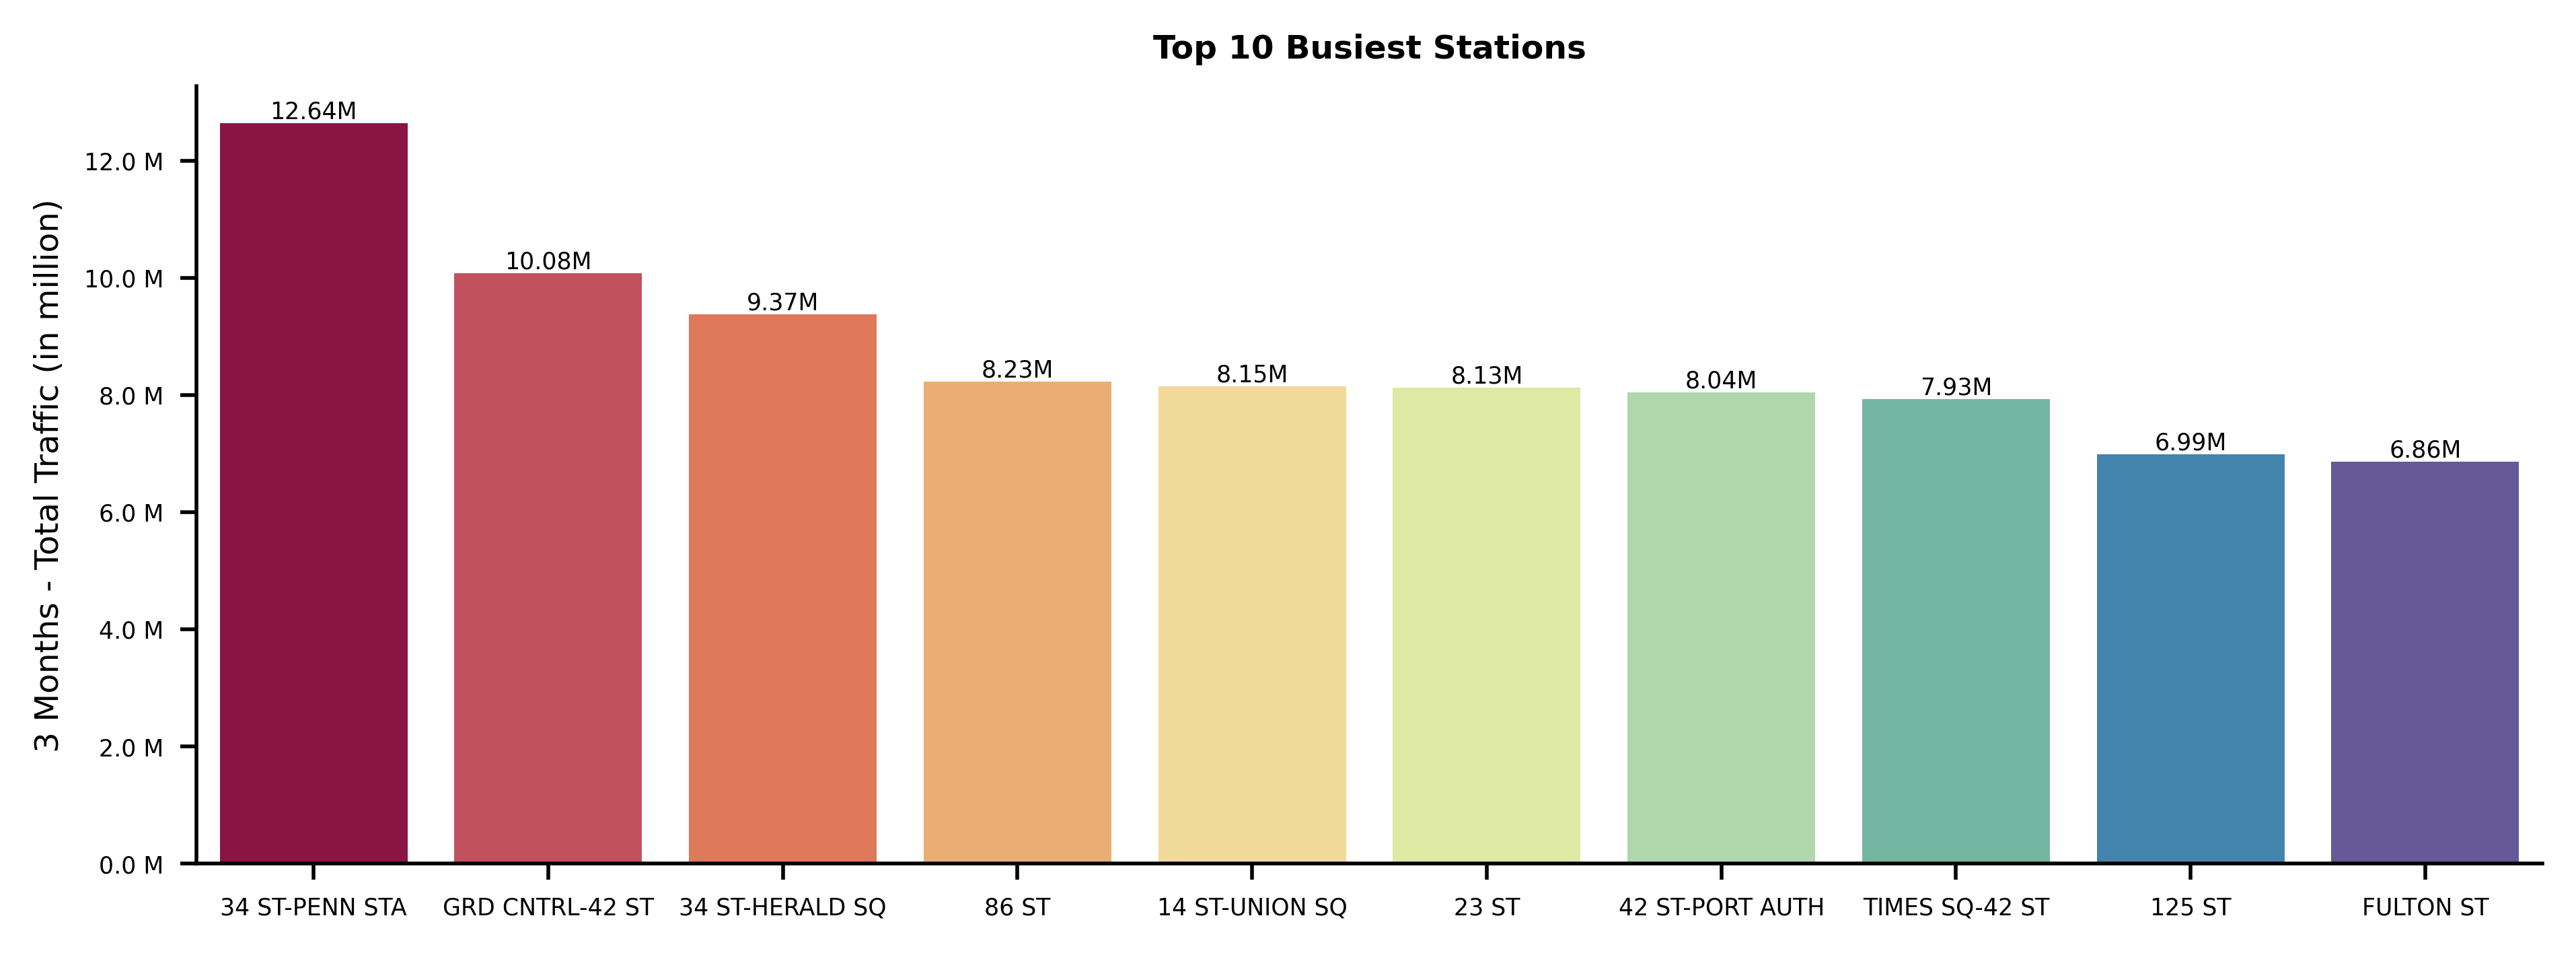

In [97]:
# Figure 1:  Total Traffic in 3 Months by Station

def million_formatter(x,pos):
    return"%.1f M" % (x/1E6)
plt.figure(figsize=(9,3),dpi=500),
plt.style.use('default')
ax = sns.barplot(x=
                 "station", y="total_traffic", palette=colors, data=top10_station)
plt.title("Top 10 Busiest Stations", weight="bold", c="black", fontsize=7)
plt.xlabel("",weight="bold",c="black", )
plt.xticks(fontsize=5 ,rotation=0)
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
ax.yaxis.set_major_formatter(million_formatter)
ax.set_facecolor("white")
plt.ylabel("3 Months - Total Traffic (in million)",c="black", fontsize=7)
plt.ylim(0)
plt.yticks(fontsize=5 ,rotation=0)
for i in ax.containers:
    ax.bar_label(i, fontsize=5, labels=[f'{x/1E6:,.2f}M' for x in i.datavalues])
sns.despine()
plt.show()

In [98]:
# create a list to flag top 10 stations 
station =top10_station.loc[:,["station"]]
station_list= station["station"].tolist()

In [99]:
# report daily total traffic by station (top 10 stations)
top10_station_daily =final_df.loc[final_df["station"].isin(station_list)].groupby(['station','date','weekend']).total_traffic.sum().reset_index().sort_values(by=['station','total_traffic'], ascending=False).reset_index()
top10_station_daily['month']=pd.to_datetime(top10_station_daily.date).dt.month


In [100]:
# report average daily traffic by station and weekday/weekend dissaggregation ( top 10 stations)
top10_station_weekend= top10_station_daily.groupby(['station', 'weekend']).total_traffic.mean().reset_index().sort_values(by=['total_traffic'],ascending=False).reset_index()
top10_station_weekend.loc[top10_station_weekend.weekend==True, 'weekend' ] = "Weekend"
top10_station_weekend.loc[top10_station_weekend.weekend==False, 'weekend' ] = "Weekday"
top10_station_weekend.head()

,index,station,weekend,total_traffic
0,8,34 ST-PENN STA,Weekday,"146,481.5"
1,16,GRD CNTRL-42 ST,Weekday,"121,126.5"
2,6,34 ST-HERALD SQ,Weekday,"105,501.9"
3,12,86 ST,Weekday,"96,920.6"
4,4,23 ST,Weekday,"95,374.4"


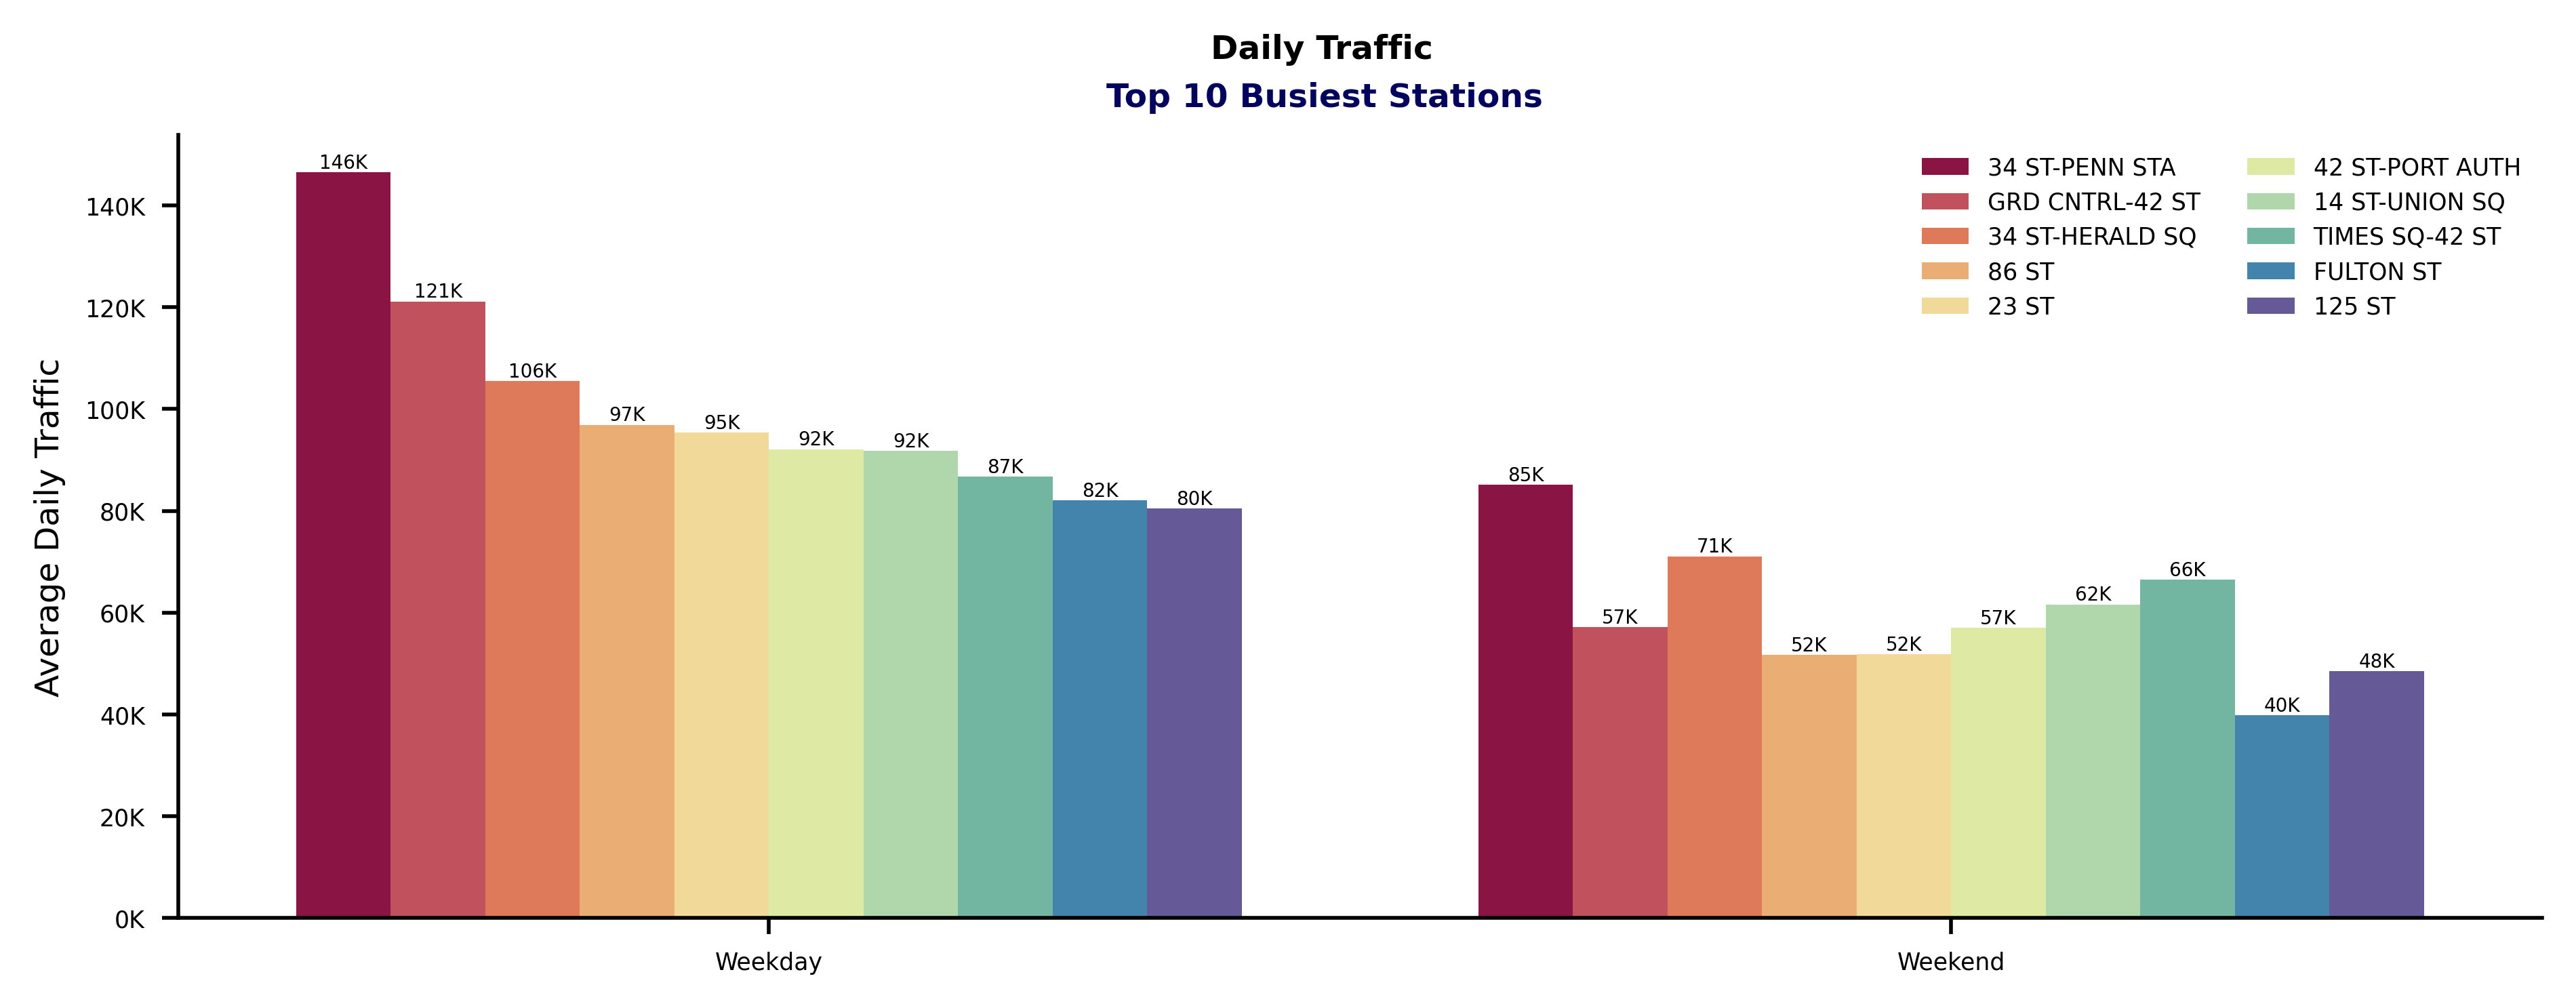

In [101]:
# Figure 2:  Average Daily Traffic by Station - dissaggregated by weekend/weekday
plt.figure(figsize=(9,3),dpi=500),
plt.style.use('default')
ax = sns.barplot(x="weekend", y="total_traffic", hue="station", palette=colors, data=top10_station_weekend)
plt.title('Top 10 Busiest Stations', weight="bold", c="#03045e", fontsize=7, x=0.485)
plt.suptitle('Daily Traffic', weight="bold", c="black", fontsize=7)
plt.xlabel("",weight="bold",c="black" )
plt.xticks(fontsize=5 ,rotation=0,)
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
ax.set_facecolor("white")
ax.yaxis.set_major_formatter(lambda y, pos: f'{y/1000:,.0f}K')
plt.ylabel("Average Daily Traffic",c="black", fontsize=7)
plt.ylim(0)
plt.yticks(fontsize=5 ,rotation=0)
for i in ax.containers:
    ax.bar_label(i, fontsize=4, labels=[f'{x/1000:,.0f}K' for x in i.datavalues])
sns.despine()
plt.legend(loc="upper right", facecolor="white", edgecolor="white", fontsize=5, ncol=2)
plt.show()


In [102]:
# report monthly total traffic by stations 
top10_station_monthly=final_df.loc[final_df.station.isin(station_list)].groupby(["station","month"]).total_traffic.sum().reset_index().sort_values(by=['station','month','total_traffic'], ascending=[False,True,False]).reset_index()
top10_station_monthly.month=top10_station_monthly.month.replace([2,3,4,5,6],['Feb','Mar','Apr','May','Jun'])
top10_station_monthly.head()

,index,station,month,total_traffic
0,45,TIMES SQ-42 ST,Feb,"186,344.8"
1,46,TIMES SQ-42 ST,Mar,"2,360,076.7"
2,47,TIMES SQ-42 ST,Apr,"2,489,708.7"
3,48,TIMES SQ-42 ST,May,"2,651,906.6"
4,49,TIMES SQ-42 ST,Jun,"240,463.2"


In [103]:
# create month-dissaggregated dataframes to plot pie charts
top10_march=top10_station_monthly.loc[top10_station_monthly.month=="Mar"]
top10_april=top10_station_monthly.loc[top10_station_monthly.month=="Apr"]
top10_may=top10_station_monthly.loc[top10_station_monthly.month=="May"]
top10_april.head()

,index,station,month,total_traffic
2,47,TIMES SQ-42 ST,Apr,"2,489,708.7"
7,42,GRD CNTRL-42 ST,Apr,"3,134,342.0"
12,37,FULTON ST,Apr,"2,123,122.5"
17,32,86 ST,Apr,"2,511,552.2"
22,27,42 ST-PORT AUTH,Apr,"2,506,718.5"


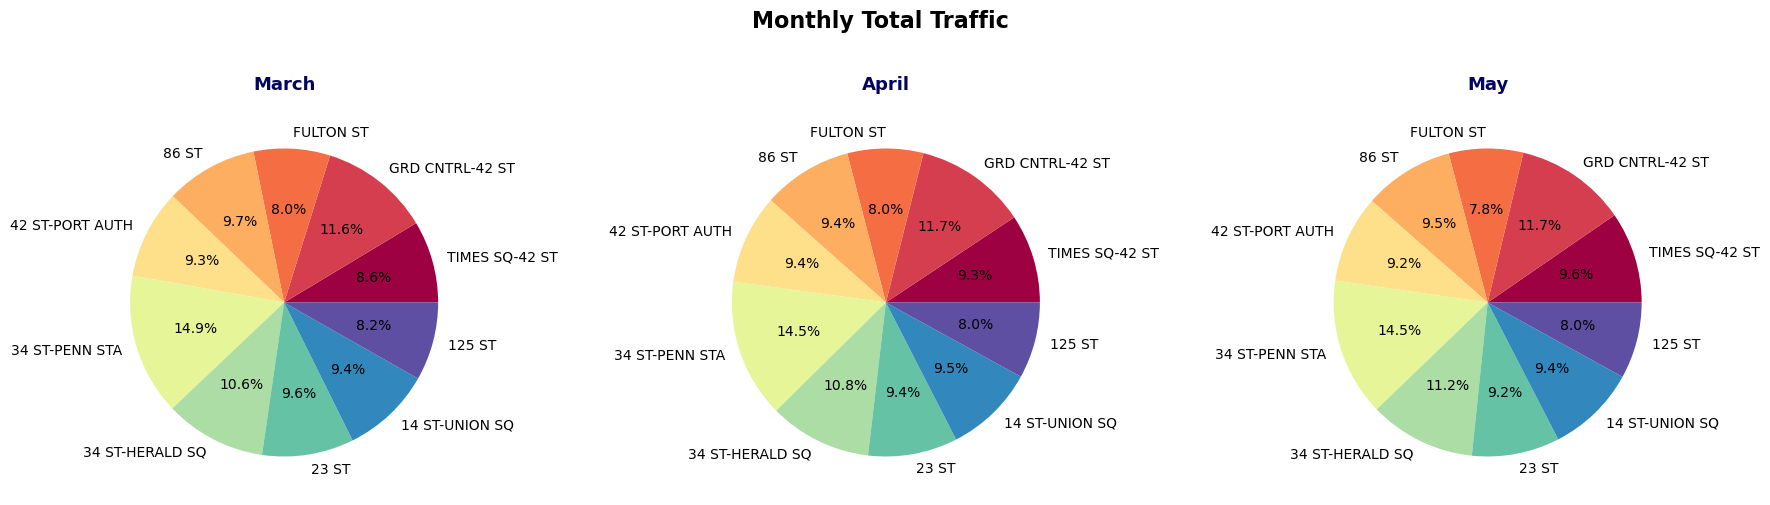

In [104]:
# Figure 3:  Monthly Total Traffic

labels_march = top10_march['station']
values_march = top10_march['total_traffic']
labels_apr = top10_april['station']
values_apr = top10_april['total_traffic']
labels_may = top10_may['station']
values_may = top10_may['total_traffic']

plt.figure(figsize=[22,5])
plt.suptitle('Monthly Total Traffic', fontsize = 16, weight="bold", y=1.08, x=0.51)

plt.subplot(1,3,1)
plt.pie(values_march, labels = labels_march, colors=colors, autopct='%1.1f%%') #plot first pie
plt.title('March',c="#03045e",fontsize = 13, weight="bold", y=1.03)

plt.subplot(1,3,2)
plt.pie(values_apr,labels = labels_apr, colors=colors, autopct='%1.1f%%' ) #plot second pie
plt.title('April',c="#03045e" ,fontsize = 13, weight="bold" , y=1.03)

plt.subplot(1,3,3)
plt.pie(values_may, labels = labels_may, colors=colors, autopct='%1.1f%%' ) #plot third pie
plt.title('May', c="#03045e",fontsize = 13 , weight="bold" , y=1.03)

plt.show()


In [105]:
# create a list to report top 5 stations
top5_station = final_df.groupby("station").total_traffic.sum().reset_index().sort_values(by=['total_traffic'], ascending=False).head(5).reset_index()
station5 =top5_station.loc[:,["station"]]
station5_list= station5["station"].tolist()


In [106]:
# report average daily traffic by stations and day of  week
top5_station_weekday =final_df.loc[final_df["station"].isin(station5_list)].groupby(['station','date','weekdays','weekend']).total_traffic.sum().reset_index().sort_values(by=['station','total_traffic'], ascending=False).reset_index()
top5_station_weekday=top5_station_weekday.loc[top5_station_weekday.weekend==False].groupby(['station','weekdays']).total_traffic.mean().reset_index().sort_values(by=['weekdays','total_traffic'], ascending=False).reset_index()


In [107]:
# create an order variable to reorder following graph
top5_station_weekday['day_code']=top5_station_weekday.weekdays
top5_station_weekday.day_code=top5_station_weekday.day_code.replace(['Monday','Tuesday','Wednesday','Thursday','Friday'],[1,2,3,4,5])
top5_station_weekday.head()

,index,station,weekdays,total_traffic,day_code
0,14,34 ST-PENN STA,Wednesday,"154,193.2",3
1,24,GRD CNTRL-42 ST,Wednesday,"130,633.0",3
2,9,34 ST-HERALD SQ,Wednesday,"109,202.5",3
3,19,86 ST,Wednesday,"98,764.4",3
4,4,14 ST-UNION SQ,Wednesday,"95,951.8",3


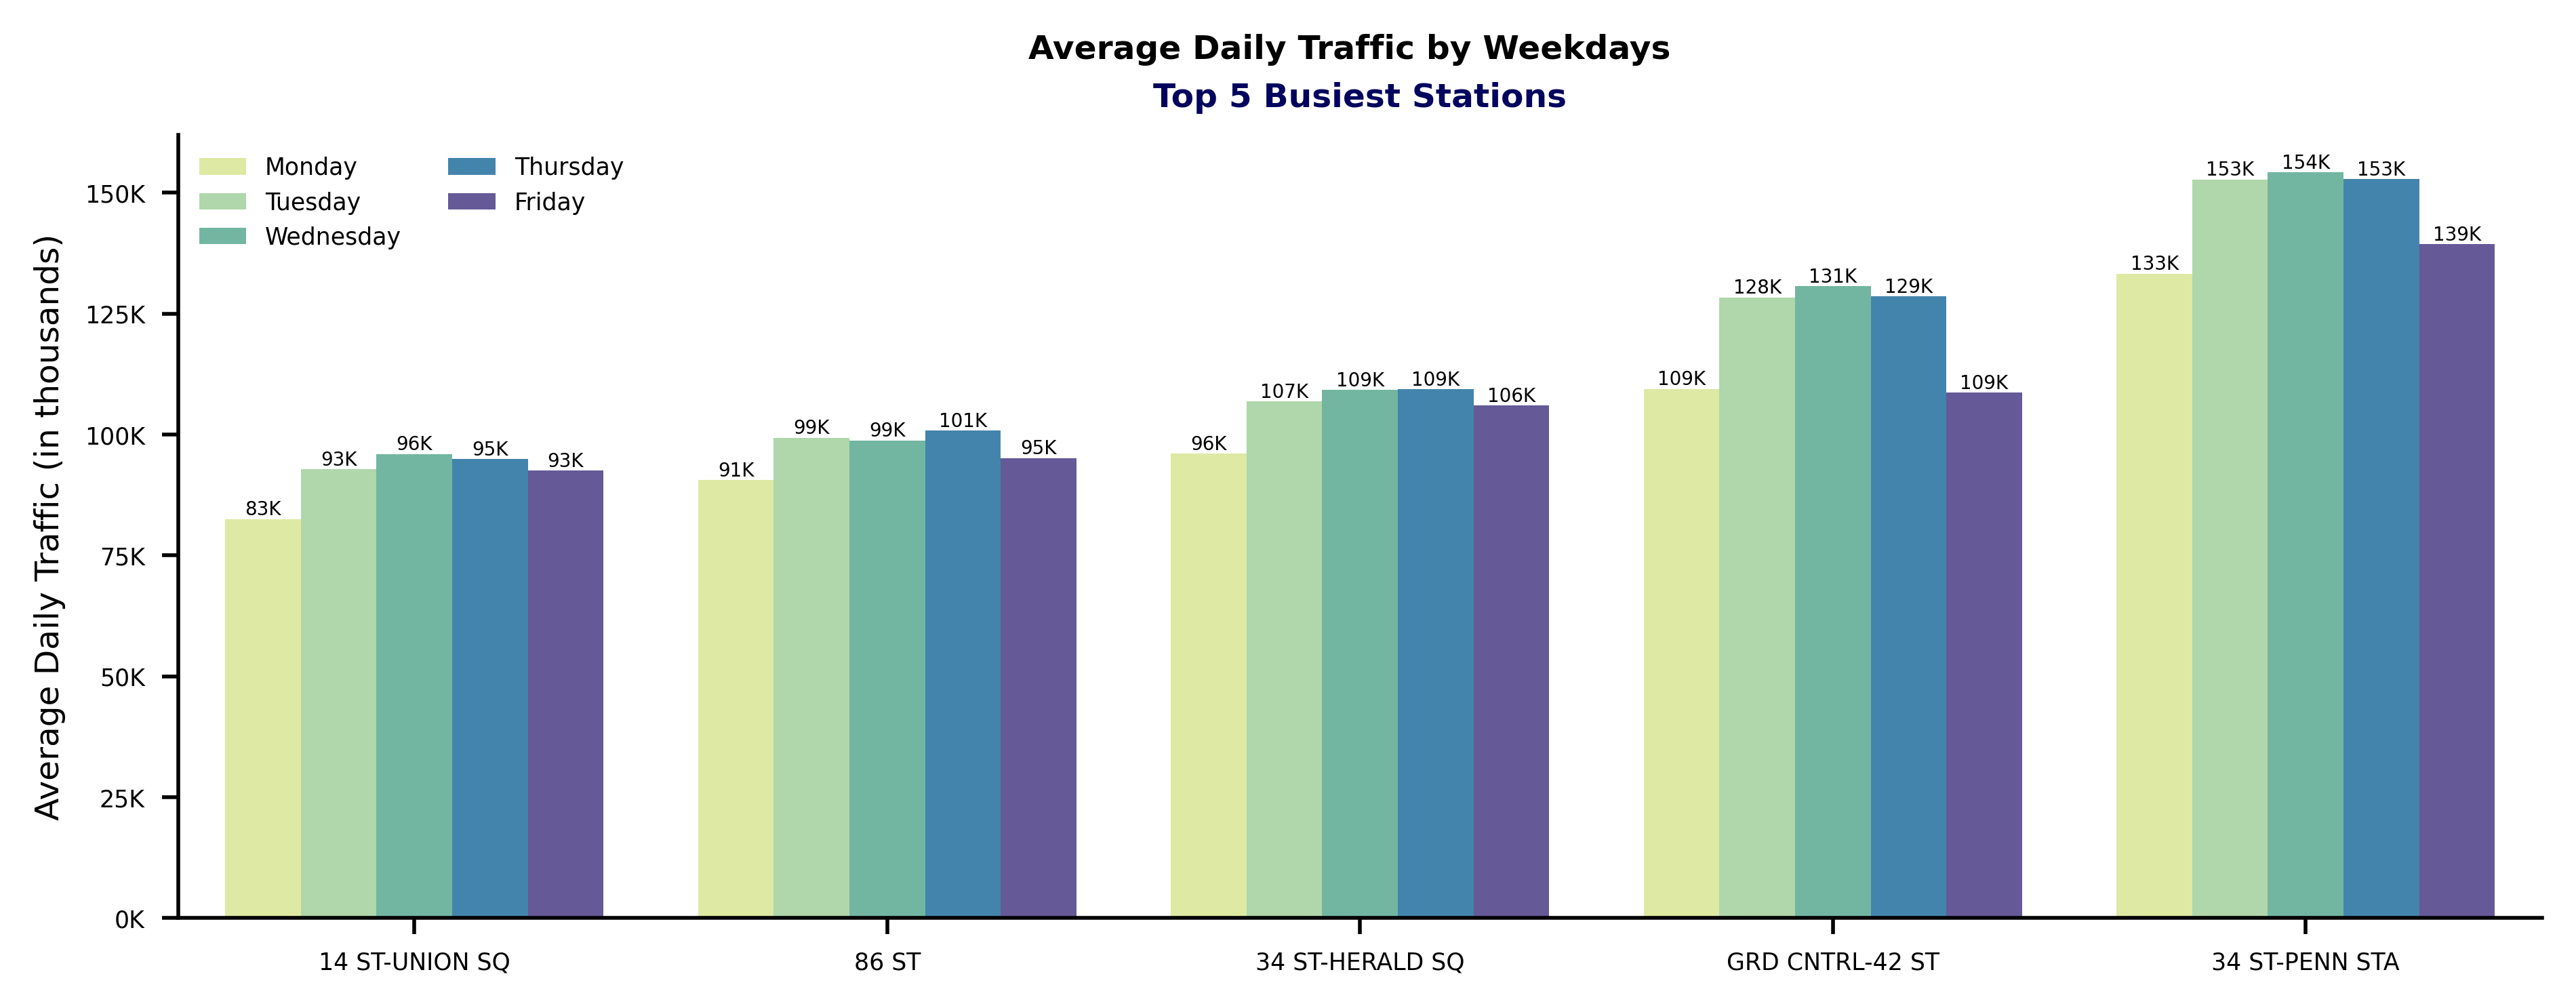

In [108]:
# define another color palette
colors2=['#e6f598','#abdda4','#66c2a5','#3288bd','#5e4fa2']

# Figure 4:  Average Daily Traffic by Weekdays 
plt.figure(figsize=(9,3),dpi=500),
plt.style.use('default')
ax = sns.barplot(x="station", y="total_traffic", hue="weekdays", palette=colors2, data=top5_station_weekday.sort_values('day_code'))
plt.title('Top 5 Busiest Stations', weight="bold", c="#03045e", fontsize=7, x=0.5)
plt.suptitle('Average Daily Traffic by Weekdays', weight="bold", c="black", fontsize=7,x=0.509)
plt.xlabel("",weight="bold",c="black" )
plt.xticks(fontsize=5 ,rotation=0,)
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
ax.set_facecolor("white")
ax.yaxis.set_major_formatter(lambda y, pos: f'{y/1000:,.0f}K')
plt.ylabel("Average Daily Traffic (in thousands)",c="black", fontsize=7)
plt.ylim(0)
plt.yticks(fontsize=5 ,rotation=0)
for i in ax.containers:
    ax.bar_label(i, fontsize=4, labels=[f'{x/1000:,.0f}K' for x in i.datavalues])
sns.despine()
plt.legend(loc="upper left", facecolor="white", edgecolor="white", fontsize=5, ncol=2)
plt.show()

In [109]:
main_df.station.value_counts()

34 ST-PENN STA     54406
GRD CNTRL-42 ST    47752
FULTON ST          41793
23 ST              37196
86 ST              34664
                   ...  
BEACH 60 ST         1698
CLEVELAND ST        1174
SUTTER AV           1173
BROAD CHANNEL       1164
NEWARK HM HE           2
Name: station, Length: 374, dtype: int64

In [110]:
# create a list to define hours that you need to keep in your dataset. 
hour_list=[0,4,8,12,16,20,1,5,9,13,17,21]

# There are significant variations in data reporting time, therefore I decided to keep only observsations with the regular time interval and belong to the specific time loops (As I mentioned before 0-4-8-12-16-20 and 1-5-9-13-17-21 are the most frequent time loops in the dataset)
top5_detail=main_df.loc[(main_df.station.isin(station5_list)) & (main_df.hour.isin(hour_list) & (main_df.time_diff_minute==240))]
top5_detail.station.value_counts()

GRD CNTRL-42 ST    43497
34 ST-PENN STA     36515
86 ST              30789
34 ST-HERALD SQ    25391
14 ST-UNION SQ     22754
Name: station, dtype: int64

In [111]:
# creata a mapping to create daily time-intervals
hour_mapping = {0:'late night'
                   ,1:'late night'
                   ,4:'late night'
                   ,5:'late night'
                   ,8:'early morning'
                   ,9:'early morning'
                   ,12:'late morning'
                   ,13:'late morning'
                   ,16:'afternoon'
                   ,17:'afternoon'
                   ,20:'evening'
                   ,21:'evening'
                   }
# assign them
top5_detail=top5_detail.assign(hour_interval = top5_detail.hour.map(hour_mapping))


In [112]:
# report average daily traffic by time-interval and station
top5_hourly=top5_detail.groupby(['station','date','hour_interval']).total_traffic.sum().reset_index()
top5_hourly=top5_hourly.groupby(['station','hour_interval']).mean().reset_index().sort_values('total_traffic')
top5_hourly.head()

,station,hour_interval,total_traffic
9,34 ST-HERALD SQ,late night,"2,082.5"
19,86 ST,late night,"2,129.3"
14,34 ST-PENN STA,late night,"2,165.3"
4,14 ST-UNION SQ,late night,"2,582.1"
24,GRD CNTRL-42 ST,late night,"3,441.0"


In [113]:
# prepare the dataframe to creare a heatmap
data_pivoted = top5_hourly.pivot("station", "hour_interval", "total_traffic")
data_pivoted=data_pivoted[['late night', 'early morning', 'late morning', 'afternoon','evening']]

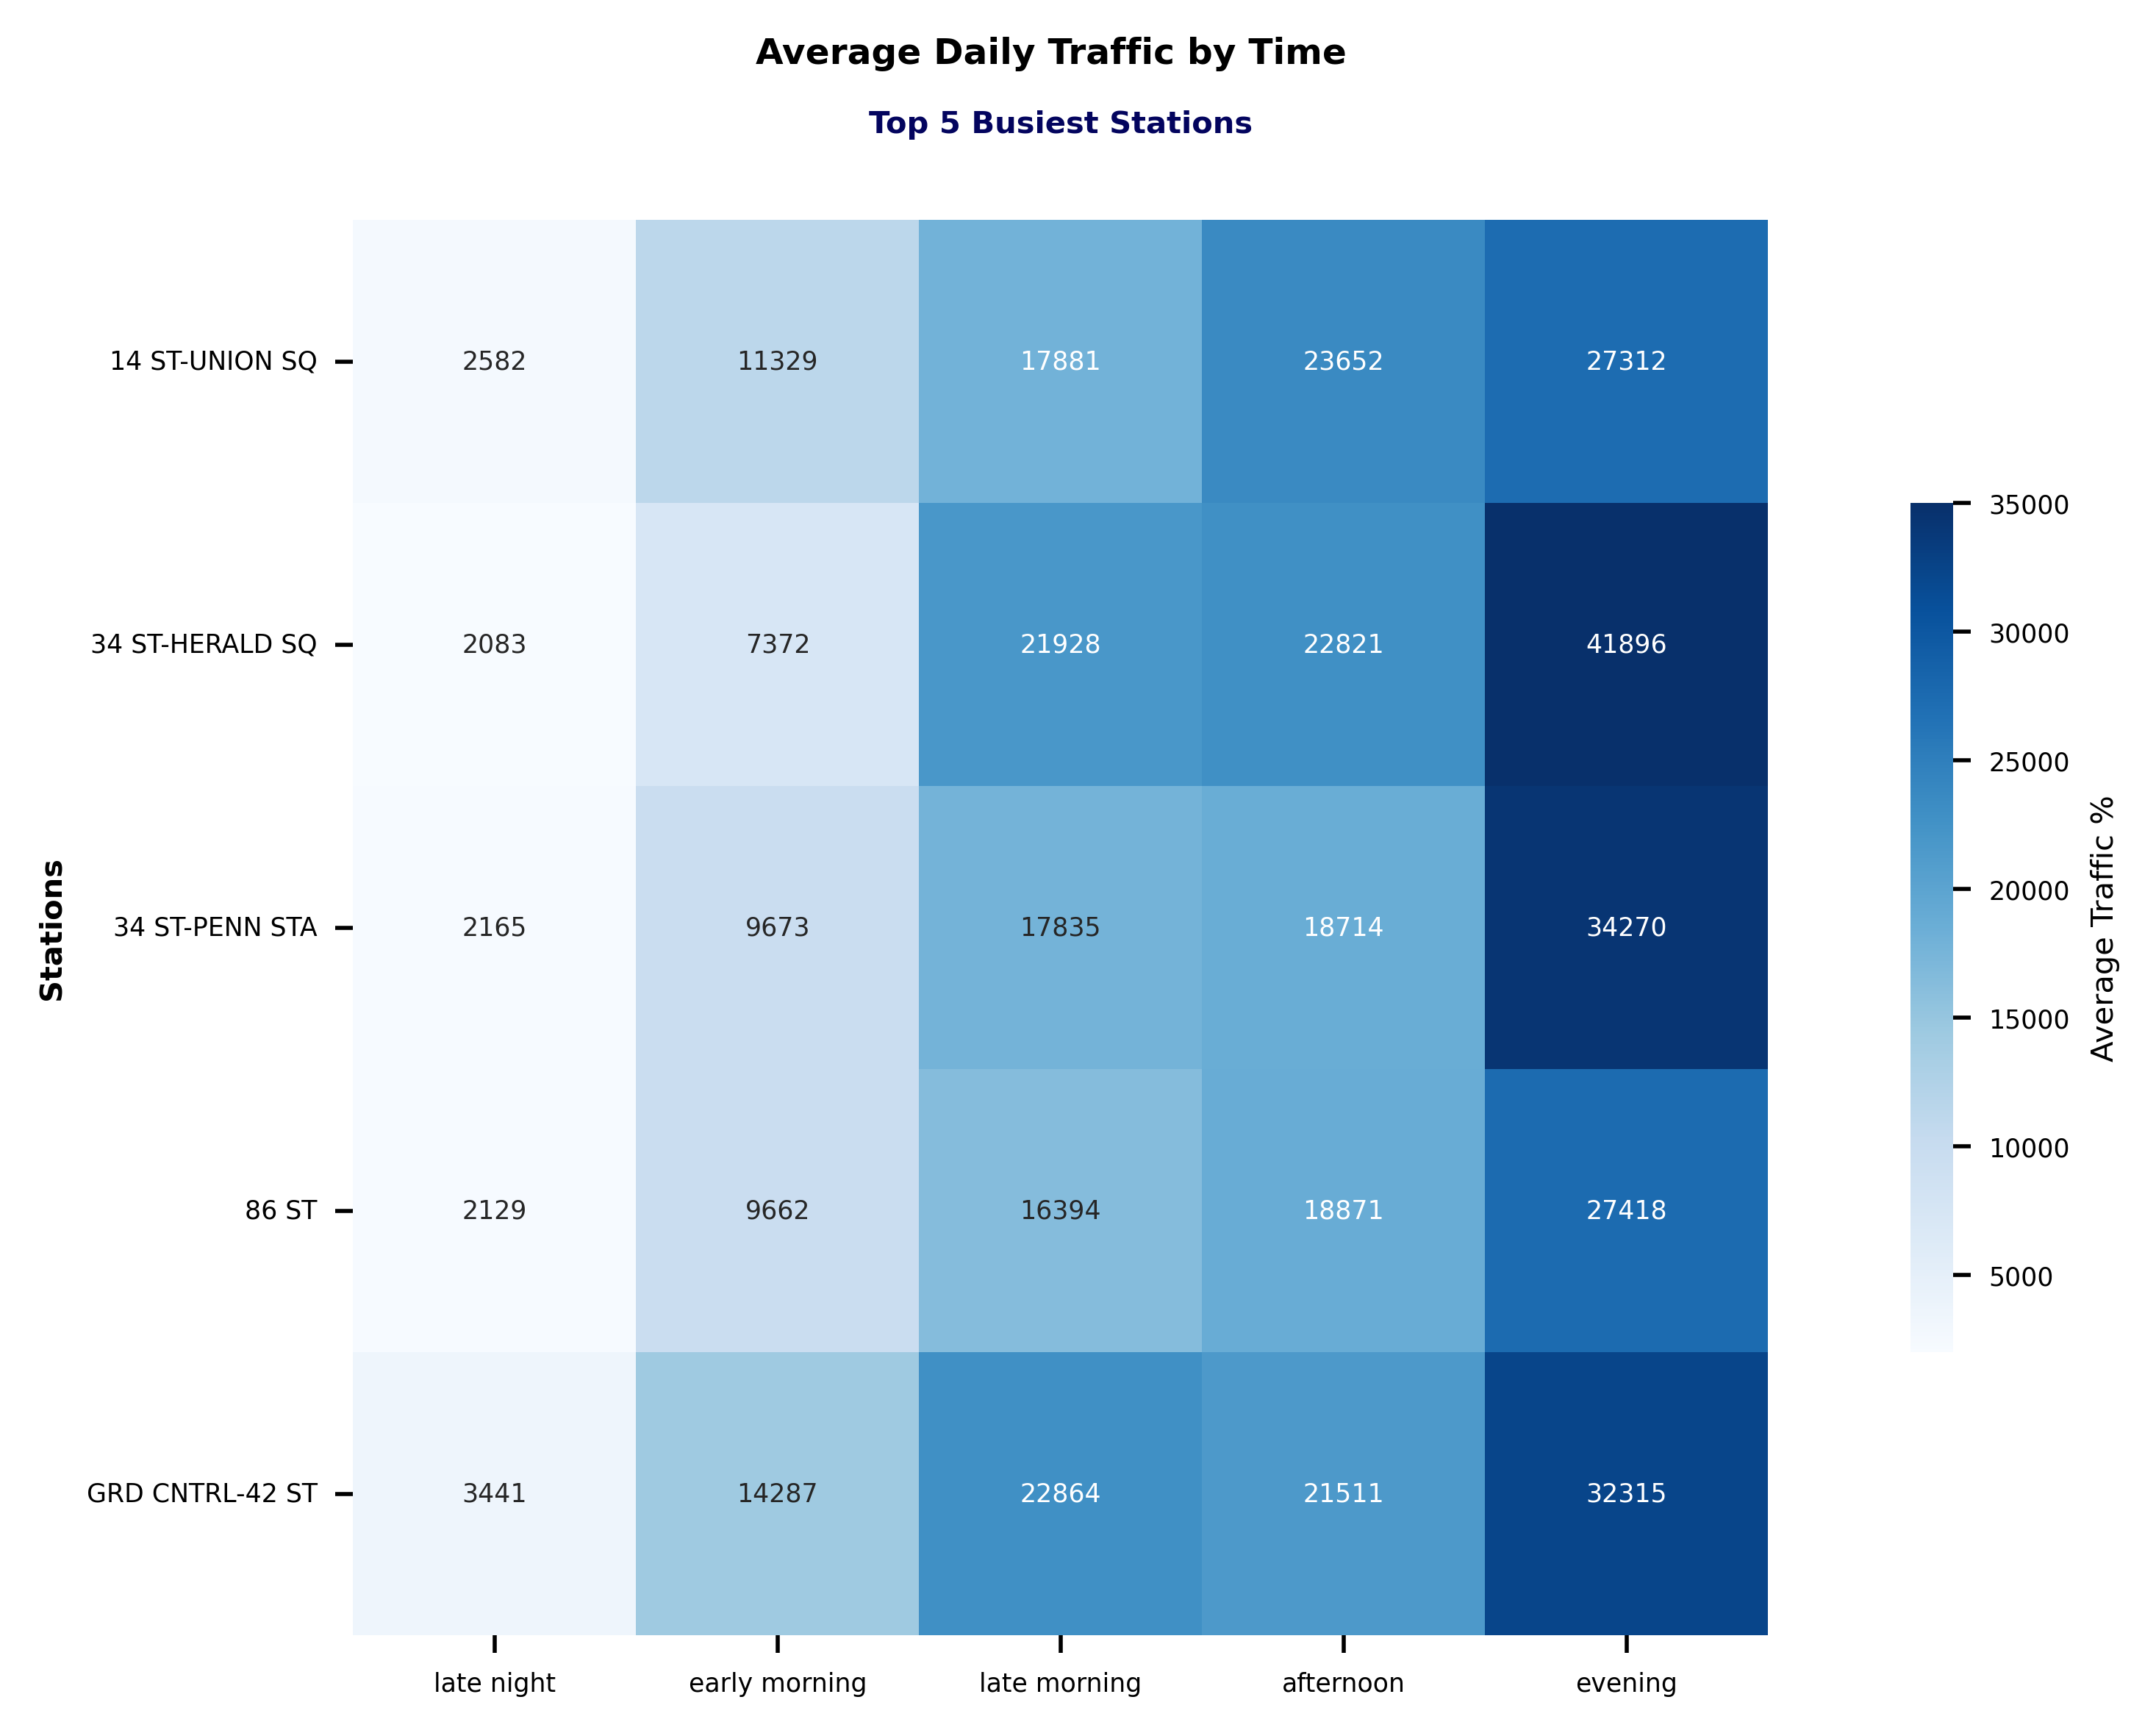

In [114]:
# Figure 5:  Average Daily Traffic by Time - flag rush hours

plt.figure(figsize=(10,5),dpi=500)
colormap = sns.color_palette("Blues", as_cmap=True)
ax = sns.heatmap(data_pivoted, 
                 cmap=colormap,
                 annot=True,
                 annot_kws={"size":5},
                 cbar_kws={'shrink': 0.6},
                 vmin=2000, vmax=35000,
                 fmt=".0f",
                 linewidth=.0,
                 square=True)
ax.figure.axes[-1].set_ylabel('Average Traffic %', size=6)
ax.figure.axes[-1].tick_params(axis="both", labelsize=5)
plt.title('Top 5 Busiest Stations', weight="bold", c="#03045e", fontsize=6, x=0.5, y=1.04)
plt.suptitle('Average Daily Traffic by Time', weight="bold", c="black", fontsize=7, x=0.55)
plt.xlabel("",weight="bold",c="black" )
plt.xticks(fontsize=5 ,rotation=0,)
plt.ylabel("Stations",weight="bold",c="black", fontsize=6 )
plt.yticks(fontsize=5 ,rotation=0,)
plt.show()


End of file --> Please do not hesitate to reach out to me in case of any additional queries regarding this study.

Done by Meliz Tyurkileri |
Email: melizturkileri@sabanciuniv.edu